# ML Models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap
import numpy as np
import scipy

In [1]:
pip install numpy==1.24



  Using cached numpy-1.24.0-cp311-cp311-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bijoy\\AppData\\Local\\Temp\\pip-uninstall-_hh8dp0h\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
print(np.__version__)

1.24.0


In [7]:
df=pd.read_csv("C://Users//Bijoy//Desktop//Mitra//Chla//ArabianGulf//AG_chla.csv")
df = df.drop(['X','Y'], axis=1)
df

FID     CHLa        PAR         POC       PIC      CDOM        SST  \
0        0  2.81966  43.569099  424.842987  0.008485  0.151142  27.533501   
1        1  2.74598  45.654701  461.678986  0.008969  0.156170  27.394400   
2        2  2.84663  45.788300  465.953003  0.007720  0.155727  27.369699   
3        3  1.49589  46.772900  335.786011  0.002396  0.104876  27.313999   
4        4  1.50185  47.663601  339.618012  0.002337  0.105725  27.288500   
...    ...      ...        ...         ...       ...       ...        ...   
4097  4097  2.15692  42.110401  321.992004  0.024140  0.108665  24.155199   
4098  4098  2.11586  42.683399  320.778992  0.024818  0.108092  24.166000   
4099  4099  2.28038  42.594799  326.919006  0.028183  0.112744  24.247101   
4100  4100  2.64026  41.954201  341.929993  0.032618  0.123029  24.335600   
4101  4101  4.14885  40.603199  402.118012  0.031688  0.277218  23.799200   

              SLP       WS       LWGAB       XGB       FNN  
0     1008.950012  5.29249  359.872986  2.817115  3.554300  
1     1008.929993  5.28391  359.427002  2.751215  3.966566  
2     1008.909973  5.26988  359.351990  2.847425  3.998617  
3     1009.010010  5.35502  359.828003  1.504663  2.200986  
4     1009.000000  5.34098  359.966003  1.497945  2.145246  
...           ...      ...         ...       ...       ...  
4097  1009.250000  5.78324  345.256012  2.162088  2.524591  
4098  1009.210022  5.77746  346.865997  2.115953  2.463796  
4099  1009.179993  5.78849  348.088989  2.424209  2.583665  
4100  1009.190002  5.78294  347.850006  2.638604  2.876619  
4101  1009.440002  6.10155  341.967987  3.988860  3.692792  

[4102 rows x 12 columns]

In [30]:
df.corr()

CHLa       PAR       POC       PIC      CDOM       SST       SLP  \
CHLa   1.000000 -0.323143  0.900544  0.484262  0.886763 -0.186651 -0.054660   
PAR   -0.323143  1.000000 -0.234142 -0.523736 -0.346119  0.803451 -0.609533   
POC    0.900544 -0.234142  1.000000  0.419694  0.913986 -0.191078  0.036146   
PIC    0.484262 -0.523736  0.419694  1.000000  0.520789 -0.356768  0.181139   
CDOM   0.886763 -0.346119  0.913986  0.520789  1.000000 -0.323242  0.199389   
SST   -0.186651  0.803451 -0.191078 -0.356768 -0.323242  1.000000 -0.879589   
SLP   -0.054660 -0.609533  0.036146  0.181139  0.199389 -0.879589  1.000000   
WS    -0.021566 -0.653766  0.053906  0.187362  0.203298 -0.889946  0.971431   
LWGAB -0.288436  0.830492 -0.302952 -0.342846 -0.354209  0.780941 -0.610948   

             WS     LWGAB  
CHLa  -0.021566 -0.288436  
PAR   -0.653766  0.830492  
POC    0.053906 -0.302952  
PIC    0.187362 -0.342846  
CDOM   0.203298 -0.354209  
SST   -0.889946  0.780941  
SLP    0.971431 -0.610948  
WS     1.000000 -0.628603  
LWGAB -0.628603  1.000000

In [5]:
df.corr()

CHL-a       SLP       SST       POC       PIC       PAR      CDOM  \
CHL-a  1.000000 -0.062086 -0.187145  0.899006  0.489271 -0.316602  0.887292   
SLP   -0.062086  1.000000 -0.878419  0.032277  0.167162 -0.603882  0.192819   
SST   -0.187145 -0.878419  1.000000 -0.192990 -0.350681  0.805120 -0.325091   
POC    0.899006  0.032277 -0.192990  1.000000  0.418153 -0.225489  0.918864   
PIC    0.489271  0.167162 -0.350681  0.418153  1.000000 -0.529539  0.534932   
PAR   -0.316602 -0.603882  0.805120 -0.225489 -0.529539  1.000000 -0.340724   
CDOM   0.887292  0.192819 -0.325091  0.918864  0.534932 -0.340724  1.000000   
WS    -0.029248  0.971487 -0.888999  0.049422  0.174479 -0.648890  0.196247   
LWGAB -0.291165 -0.605837  0.777513 -0.308162 -0.344419  0.832921 -0.359452   

             WS     LWGAB  
CHL-a -0.029248 -0.291165  
SLP    0.971487 -0.605837  
SST   -0.888999  0.777513  
POC    0.049422 -0.308162  
PIC    0.174479 -0.344419  
PAR   -0.648890  0.832921  
CDOM   0.196247 -0.359452  
WS     1.000000 -0.624231  
LWGAB -0.624231  1.000000

Bagging

In [3]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset into a Pandas DataFrame
df = df

# Extract features and target variable
X = df.drop(['CHL-a'], axis=1)
y = df['CHL-a']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
gbm = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")

# Calculate MAD (%)
mad_percentage = 100 * scipy.mean(abs(y_test - y_pred)) / scipy.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * scipy.mean(y_test - y_pred) / scipy.mean(y_test)
print(f"MBD (%): {mbd_percentage}")

# Initialize the SHAP explainer with the RF model
explainer = shap.Explainer(gbm, X)


# Compute SHAP values
shap_values = explainer(X)

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_abs_shap_values})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

R-squared: 0.9436644691282061
RMSE: 0.18162658724388397
Willmott's Index of Agreement: 0.9408019232550532
MAD (%): 4.311972825316414
MBD (%): 0.2763611611290976


scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
100%|===================| 12349/12393 [00:52<00:00]        

  Feature  Importance
2     POC    0.334843
0     SLP    0.100075
5    CDOM    0.095564
6      WS    0.039299
4     PAR    0.038889
3     PIC    0.021481
7   LWGAB    0.014894
1     SST    0.011115


In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV


# Extract features and target variable
X = df.drop(['CHL-a'], axis=1)
y = df['CHL-a']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter search space for Bayesian optimization
param_space = {
    'num_leaves': (10, 50),
    'learning_rate': (0.01, 0.1),
    'feature_fraction': (0.1, 0.9),
    'bagging_fraction': (0.5, 0.9),
    'bagging_freq': (1, 10)
}

# Define the Bayesian optimization search using cross-validation
opt = BayesSearchCV(
    estimator=lgb.LGBMRegressor(),
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=50,
    random_state=42
)

# Perform the Bayesian optimization search
opt.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = opt.best_params_

# Build the LightGBM model with the best hyperparameters
best_gbm = lgb.LGBMRegressor(**best_params)

# Train the model with the best hyperparameters
best_gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gbm.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")


# Calculate MAD (%)
mad_percentage = 100 * scipy.mean(abs(y_test - y_pred)) / scipy.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * scipy.mean(y_test - y_pred) / scipy.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


AttributeError: module 'numpy' has no attribute 'int'

In [5]:
print(np.__version__)

1.24.0


In [5]:
# Make predictions on the test set
y_pred = best_gbm.predict(X_train)

# Calculate R-squared
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_train - y_pred))
denominator = np.sum(np.abs(y_train - np.mean(y_train)) + np.abs(y_pred - np.mean(y_train)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")

# Calculate MAD (%)
mad_percentage = 100 * scipy.mean(abs(y_train - y_pred)) / scipy.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * scipy.mean(y_train - y_pred) / scipy.mean(y_test)
print(f"MBD (%): {mbd_percentage}")

R-squared: 0.9925893081546195
RMSE: 0.06464154357520709
Willmott's Index of Agreement: 0.9674674703188767
MAD (%): 2.429175690582604
MBD (%): -0.00418022427546492


scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


In [28]:
y_pred_f = opt.predict(X)
data=pd.DataFrame(y_pred_f)
data.to_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//data.csv")

XGBoost

In [36]:

from xgboost import XGBRegressor

# Extract features and target variable
X = df.drop(['CHLa'], axis=1)
y = df['CHLa']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost regressor
xgb_regressor = XGBRegressor(random_state=42)

# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")


# Calculate MAD (%)
mad_percentage = 100 * np.mean(abs(y_test - y_pred)) / np.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * np.mean(y_test - y_pred) / np.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


# Initialize the SHAP explainer with the RF model
explainer = shap.Explainer(xgb_regressor, X)


# Compute SHAP values
shap_values = explainer(X)

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_abs_shap_values})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Get feature importances
#importance_scores = xgb_regressor.feature_importances_

# Create a DataFrame to display the importance scores
#importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
#importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
#print(importance_df)

R-squared: 0.9791114924464579
RMSE: 0.11178963494817583
Willmott's Index of Agreement: 0.9463625367222999
MAD (%): 4.08923285989999
MBD (%): -0.3198571068985146


100%|===================| 4089/4102 [00:17<00:00]        

  Feature  Importance
1     POC    0.310149
3    CDOM    0.136111
5     SLP    0.114331
0     PAR    0.047194
6      WS    0.030132
4     SST    0.026668
2     PIC    0.025041
7   LWGAB    0.018220


Cross Validation

In [43]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
model = XGBRegressor(random_state=42)

# Set up KFold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {'r2': make_scorer(r2_score), 'neg_rmse': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))}

# Perform cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=k_fold, scoring=scoring)

# Access the scores
r2_scores = cv_results['test_r2']
rmse_scores = -cv_results['test_neg_rmse']

# Print the results
print("Cross-validated R-squared scores:", r2_scores)
print("Average R-squared:", np.mean(r2_scores))
print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))


Cross-validated R-squared scores: [0.96505662 0.91753605 0.9620572  0.97387198 0.97148991]
Average R-squared: 0.9580023523809675
Cross-validated RMSE scores: [0.14052382 0.23124703 0.16115315 0.12082472 0.11860484]
Average RMSE: 0.15447071045149202


Optimized

In [3]:

from xgboost import XGBRegressor
from skopt import BayesSearchCV


# Extract features and target variable
X = df.drop(['CHLa'], axis=1)
y = df['CHLa']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost regressor
xgb_regressor = XGBRegressor(random_state=42)

# Define the parameter search space for Bayesian optimization
param_space = {
    'n_estimators': (10, 100),
    'max_depth': (1, 10),
    'learning_rate': (0.01, 0.5),
    'subsample': (0.1, 1.0),
    'colsample_bytree': (0.1, 1.0),
    'gamma': (0, 5),
}

# Define the Bayesian optimization search using cross-validation
opt = BayesSearchCV(
    estimator=xgb_regressor,
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=50,
    random_state=42
)

# Perform the Bayesian optimization search
opt.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = opt.best_params_

# Build the XGBoost regressor with the best hyperparameters
best_xgb = XGBRegressor(random_state=42, **best_params)

# Train the XGBoost regressor with the best hyperparameters
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")


# Calculate MAD (%)
mad_percentage = 100 * np.mean(abs(y_test - y_pred)) / np.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * np.mean(y_test - y_pred) / np.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


R-squared: 0.9676386587665536
RMSE: 0.1391429121762621
Willmott's Index of Agreement: 0.9389931822797454
MAD (%): 4.6286493286897015
MBD (%): -0.19924491922165147


In [5]:
best_params

OrderedDict([('colsample_bytree', 0.5038774169617533),
             ('gamma', 0),
             ('learning_rate', 0.23017219826251192),
             ('max_depth', 10),
             ('n_estimators', 100),
             ('subsample', 0.8462447030132239)])

Cross Validation

In [46]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
model = XGBRegressor(colsample_bytree=0.5038774169617533,
                     gamma=0,
                     learning_rate=0.23017219826251192,
                     max_depth=10,
                     n_estimators=100,
                     subsample=0.8462447030132239)

# Set up KFold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {'r2': make_scorer(r2_score), 'neg_rmse': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))}

# Perform cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=k_fold, scoring=scoring)

# Access the scores
r2_scores = cv_results['test_r2']
rmse_scores = -cv_results['test_neg_rmse']

# Print the results
print("Cross-validated R-squared scores:", r2_scores)
print("Average R-squared:", np.mean(r2_scores))
print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))


Cross-validated R-squared scores: [0.97226111 0.91114196 0.94515719 0.96831532 0.97264771]
Average R-squared: 0.9539046586408526
Cross-validated RMSE scores: [0.12520222 0.24004487 0.19374654 0.13305377 0.11617161]
Average RMSE: 0.16164380420266916


In [48]:
# Make predictions on the test set
y_pred = best_xgb.predict(X_train)

# Calculate R-squared
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_train - y_pred))
denominator = np.sum(np.abs(y_train - np.mean(y_train)) + np.abs(y_pred - np.mean(y_train)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")

# Calculate MAD (%)
mad_percentage = 100 * np.mean(abs(y_train - y_pred)) / np.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * np.mean(y_train - y_pred) / np.mean(y_test)
print(f"MBD (%): {mbd_percentage}")

R-squared: 0.9999647879980104
RMSE: 0.004558380280194999
Willmott's Index of Agreement: 0.9970103940434661
MAD (%): 0.21988995781013865
MBD (%): 0.00029836037026511377


In [50]:
y_pred_f = opt.predict(X)
data=pd.DataFrame(y_pred_f)
data.to_csv("C://Users//Bijoy//Desktop//Mitra//Chla//ArabianGulf///XGBdata.csv")

CatBoost

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from catboost import CatBoostRegressor
from sklearn.inspection import permutation_importance

# Extract features and target variable
X = df.drop(['CHL-a'], axis=1)
y = df['CHL-a']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost regressor
catboost = CatBoostRegressor()

# Train the CatBoost regressor
catboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")


# Calculate MAD (%)
mad_percentage = 100 * scipy.mean(abs(y_test - y_pred)) / scipy.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * scipy.mean(y_test - y_pred) / scipy.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


# Calculate permutation feature importance
perm_importance = permutation_importance(catboost, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances
importance_scores = perm_importance.importances_mean

# Get feature names
feature_names = X.columns

# Calculate importances in percentage
importance_scores_percent = (importance_scores / importance_scores.sum()) * 100

# Display feature importances in percentage
for feature, importance in zip(feature_names, importance_scores_percent):
    print(f"Feature: {feature}, Importance (%): {importance}")


Learning rate set to 0.058828
0:	learn: 0.7133595	total: 4.86ms	remaining: 4.86s
1:	learn: 0.6793713	total: 8.92ms	remaining: 4.45s
2:	learn: 0.6469635	total: 12.9ms	remaining: 4.27s
3:	learn: 0.6157584	total: 16.7ms	remaining: 4.15s
4:	learn: 0.5876244	total: 20.7ms	remaining: 4.11s
5:	learn: 0.5601968	total: 24.6ms	remaining: 4.07s
6:	learn: 0.5358212	total: 28.5ms	remaining: 4.04s
7:	learn: 0.5111109	total: 32.4ms	remaining: 4.01s
8:	learn: 0.4893217	total: 36.6ms	remaining: 4.03s
9:	learn: 0.4674322	total: 40.7ms	remaining: 4.03s
10:	learn: 0.4467967	total: 44.5ms	remaining: 4s
11:	learn: 0.4282115	total: 48.3ms	remaining: 3.98s
12:	learn: 0.4100188	total: 52.6ms	remaining: 3.99s
13:	learn: 0.3931591	total: 56.4ms	remaining: 3.97s
14:	learn: 0.3778793	total: 60.3ms	remaining: 3.96s
15:	learn: 0.3630503	total: 64.3ms	remaining: 3.96s
16:	learn: 0.3495979	total: 68.6ms	remaining: 3.97s
17:	learn: 0.3361547	total: 72.5ms	remaining: 3.95s
18:	learn: 0.3238308	total: 76.3ms	remaining: 3

184:	learn: 0.1053117	total: 798ms	remaining: 3.52s
185:	learn: 0.1049842	total: 803ms	remaining: 3.51s
186:	learn: 0.1047757	total: 807ms	remaining: 3.51s
187:	learn: 0.1045160	total: 812ms	remaining: 3.5s
188:	learn: 0.1042304	total: 817ms	remaining: 3.5s
189:	learn: 0.1039366	total: 822ms	remaining: 3.5s
190:	learn: 0.1037181	total: 828ms	remaining: 3.51s
191:	learn: 0.1035849	total: 836ms	remaining: 3.52s
192:	learn: 0.1033770	total: 840ms	remaining: 3.51s
193:	learn: 0.1030305	total: 846ms	remaining: 3.51s
194:	learn: 0.1029871	total: 849ms	remaining: 3.51s
195:	learn: 0.1028733	total: 853ms	remaining: 3.5s
196:	learn: 0.1026707	total: 857ms	remaining: 3.49s
197:	learn: 0.1025359	total: 861ms	remaining: 3.49s
198:	learn: 0.1023579	total: 865ms	remaining: 3.48s
199:	learn: 0.1020696	total: 869ms	remaining: 3.48s
200:	learn: 0.1020497	total: 873ms	remaining: 3.47s
201:	learn: 0.1017896	total: 879ms	remaining: 3.47s
202:	learn: 0.1016054	total: 884ms	remaining: 3.47s
203:	learn: 0.10

343:	learn: 0.0826172	total: 1.58s	remaining: 3.02s
344:	learn: 0.0824822	total: 1.59s	remaining: 3.01s
345:	learn: 0.0824023	total: 1.59s	remaining: 3.01s
346:	learn: 0.0822912	total: 1.6s	remaining: 3.01s
347:	learn: 0.0821958	total: 1.6s	remaining: 3.01s
348:	learn: 0.0820433	total: 1.61s	remaining: 3s
349:	learn: 0.0819661	total: 1.61s	remaining: 2.99s
350:	learn: 0.0818371	total: 1.62s	remaining: 2.99s
351:	learn: 0.0817481	total: 1.62s	remaining: 2.98s
352:	learn: 0.0816676	total: 1.62s	remaining: 2.98s
353:	learn: 0.0815836	total: 1.63s	remaining: 2.97s
354:	learn: 0.0814729	total: 1.63s	remaining: 2.97s
355:	learn: 0.0814017	total: 1.64s	remaining: 2.96s
356:	learn: 0.0813533	total: 1.64s	remaining: 2.96s
357:	learn: 0.0813048	total: 1.64s	remaining: 2.95s
358:	learn: 0.0811558	total: 1.65s	remaining: 2.94s
359:	learn: 0.0810179	total: 1.65s	remaining: 2.94s
360:	learn: 0.0809446	total: 1.66s	remaining: 2.93s
361:	learn: 0.0808431	total: 1.66s	remaining: 2.93s
362:	learn: 0.080

532:	learn: 0.0672879	total: 2.37s	remaining: 2.07s
533:	learn: 0.0672538	total: 2.37s	remaining: 2.07s
534:	learn: 0.0672099	total: 2.38s	remaining: 2.06s
535:	learn: 0.0671549	total: 2.38s	remaining: 2.06s
536:	learn: 0.0671034	total: 2.38s	remaining: 2.06s
537:	learn: 0.0670487	total: 2.39s	remaining: 2.05s
538:	learn: 0.0670097	total: 2.39s	remaining: 2.05s
539:	learn: 0.0669627	total: 2.4s	remaining: 2.04s
540:	learn: 0.0669207	total: 2.4s	remaining: 2.04s
541:	learn: 0.0668407	total: 2.41s	remaining: 2.03s
542:	learn: 0.0667716	total: 2.41s	remaining: 2.03s
543:	learn: 0.0667263	total: 2.41s	remaining: 2.02s
544:	learn: 0.0666960	total: 2.42s	remaining: 2.02s
545:	learn: 0.0666446	total: 2.42s	remaining: 2.01s
546:	learn: 0.0665894	total: 2.43s	remaining: 2.01s
547:	learn: 0.0665342	total: 2.43s	remaining: 2s
548:	learn: 0.0664877	total: 2.43s	remaining: 2s
549:	learn: 0.0664302	total: 2.44s	remaining: 1.99s
550:	learn: 0.0663316	total: 2.44s	remaining: 1.99s
551:	learn: 0.066272

705:	learn: 0.0590079	total: 3.16s	remaining: 1.32s
706:	learn: 0.0589856	total: 3.17s	remaining: 1.31s
707:	learn: 0.0589568	total: 3.17s	remaining: 1.31s
708:	learn: 0.0589264	total: 3.18s	remaining: 1.3s
709:	learn: 0.0588859	total: 3.18s	remaining: 1.3s
710:	learn: 0.0588542	total: 3.19s	remaining: 1.29s
711:	learn: 0.0588194	total: 3.19s	remaining: 1.29s
712:	learn: 0.0588021	total: 3.2s	remaining: 1.29s
713:	learn: 0.0587646	total: 3.2s	remaining: 1.28s
714:	learn: 0.0587238	total: 3.2s	remaining: 1.28s
715:	learn: 0.0586874	total: 3.21s	remaining: 1.27s
716:	learn: 0.0586358	total: 3.21s	remaining: 1.27s
717:	learn: 0.0585919	total: 3.22s	remaining: 1.26s
718:	learn: 0.0585696	total: 3.22s	remaining: 1.26s
719:	learn: 0.0585409	total: 3.22s	remaining: 1.25s
720:	learn: 0.0585006	total: 3.23s	remaining: 1.25s
721:	learn: 0.0584618	total: 3.23s	remaining: 1.24s
722:	learn: 0.0583961	total: 3.23s	remaining: 1.24s
723:	learn: 0.0583420	total: 3.24s	remaining: 1.23s
724:	learn: 0.058

878:	learn: 0.0528557	total: 4.16s	remaining: 573ms
879:	learn: 0.0528285	total: 4.17s	remaining: 569ms
880:	learn: 0.0527705	total: 4.18s	remaining: 565ms
881:	learn: 0.0527267	total: 4.2s	remaining: 562ms
882:	learn: 0.0526869	total: 4.21s	remaining: 557ms
883:	learn: 0.0526590	total: 4.22s	remaining: 554ms
884:	learn: 0.0526211	total: 4.24s	remaining: 551ms
885:	learn: 0.0526025	total: 4.25s	remaining: 547ms
886:	learn: 0.0525775	total: 4.25s	remaining: 542ms
887:	learn: 0.0525707	total: 4.26s	remaining: 537ms
888:	learn: 0.0525453	total: 4.27s	remaining: 533ms
889:	learn: 0.0525218	total: 4.27s	remaining: 528ms
890:	learn: 0.0524879	total: 4.28s	remaining: 523ms
891:	learn: 0.0524644	total: 4.28s	remaining: 519ms
892:	learn: 0.0524430	total: 4.29s	remaining: 514ms
893:	learn: 0.0524365	total: 4.29s	remaining: 509ms
894:	learn: 0.0524302	total: 4.3s	remaining: 504ms
895:	learn: 0.0524043	total: 4.3s	remaining: 500ms
896:	learn: 0.0523729	total: 4.31s	remaining: 495ms
897:	learn: 0.0

scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


Feature: SLP, Importance (%): 9.267501397257266
Feature: SST, Importance (%): 2.372621118140563
Feature: POC, Importance (%): 42.97165980201626
Feature: PIC, Importance (%): 1.514962987408584
Feature: PAR, Importance (%): 3.49712555789801
Feature: CDOM, Importance (%): 35.325693189628424
Feature: WS, Importance (%): 3.6880610730086945
Feature: LWGAB, Importance (%): 1.3623748746422162


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from catboost import CatBoostRegressor
from skopt import BayesSearchCV

# Extract features and target variable
X = df.drop(['CHL-a'], axis=1)
y = df['CHL-a']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost regressor
catboost = CatBoostRegressor()

# Define the parameter search space for Bayesian optimization
param_space = {
    'learning_rate': (0.01, 1.0),
    'depth': (1, 10),
    'l2_leaf_reg': (0.1, 10.0),
    'iterations': (10, 50),
}

# Define the Bayesian optimization search using cross-validation
opt = BayesSearchCV(catboost, param_space, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform the Bayesian optimization search
opt.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = opt.best_params_

# Build the CatBoost regressor with the best hyperparameters
best_catboost = CatBoostRegressor(**best_params)

# Train the CatBoost regressor with the best hyperparameters
best_catboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_catboost.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")


# Calculate MAD (%)
mad_percentage = 100 * scipy.mean(abs(y_test - y_pred)) / scipy.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * scipy.mean(y_test - y_pred) / scipy.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


0:	learn: 0.5622867	total: 155ms	remaining: 5.89s
1:	learn: 0.4343357	total: 165ms	remaining: 3.06s
2:	learn: 0.3463947	total: 176ms	remaining: 2.11s
3:	learn: 0.2880733	total: 185ms	remaining: 1.62s
4:	learn: 0.2483198	total: 194ms	remaining: 1.32s
5:	learn: 0.2226729	total: 203ms	remaining: 1.12s
6:	learn: 0.2061608	total: 212ms	remaining: 968ms
7:	learn: 0.1957123	total: 222ms	remaining: 858ms
8:	learn: 0.1876936	total: 228ms	remaining: 761ms
9:	learn: 0.1810141	total: 235ms	remaining: 680ms
10:	learn: 0.1755669	total: 239ms	remaining: 608ms
11:	learn: 0.1706441	total: 243ms	remaining: 547ms
12:	learn: 0.1672281	total: 247ms	remaining: 494ms
13:	learn: 0.1648044	total: 251ms	remaining: 448ms
14:	learn: 0.1627971	total: 254ms	remaining: 406ms
15:	learn: 0.1599584	total: 257ms	remaining: 369ms
16:	learn: 0.1577146	total: 260ms	remaining: 336ms
17:	learn: 0.1560468	total: 263ms	remaining: 307ms
18:	learn: 0.1546440	total: 265ms	remaining: 279ms
19:	learn: 0.1525812	total: 268ms	remaini

6:	learn: 0.2089393	total: 23ms	remaining: 105ms
7:	learn: 0.1978829	total: 26.6ms	remaining: 103ms
8:	learn: 0.1883950	total: 30.3ms	remaining: 101ms
9:	learn: 0.1821191	total: 33.6ms	remaining: 97.5ms
10:	learn: 0.1767817	total: 37.2ms	remaining: 94.6ms
11:	learn: 0.1720667	total: 40.4ms	remaining: 91ms
12:	learn: 0.1709180	total: 45.9ms	remaining: 91.8ms
13:	learn: 0.1666781	total: 49.8ms	remaining: 89ms
14:	learn: 0.1642816	total: 52.5ms	remaining: 83.9ms
15:	learn: 0.1611969	total: 55.1ms	remaining: 79.2ms
16:	learn: 0.1604858	total: 57.6ms	remaining: 74.6ms
17:	learn: 0.1588301	total: 61ms	remaining: 71.1ms
18:	learn: 0.1574739	total: 63.8ms	remaining: 67.1ms
19:	learn: 0.1562996	total: 66.3ms	remaining: 63ms
20:	learn: 0.1555284	total: 68.9ms	remaining: 59.1ms
21:	learn: 0.1540147	total: 72.1ms	remaining: 55.7ms
22:	learn: 0.1526001	total: 75.7ms	remaining: 52.7ms
23:	learn: 0.1523627	total: 78.4ms	remaining: 49ms
24:	learn: 0.1494754	total: 81.1ms	remaining: 45.4ms
25:	learn: 0

42:	learn: 0.0588660	total: 779ms	remaining: 36.2ms
43:	learn: 0.0575672	total: 801ms	remaining: 18.2ms
44:	learn: 0.0567319	total: 819ms	remaining: 0us
0:	learn: 0.2713681	total: 22.1ms	remaining: 972ms
1:	learn: 0.2122325	total: 38.9ms	remaining: 836ms
2:	learn: 0.1886478	total: 54.5ms	remaining: 763ms
3:	learn: 0.1689672	total: 70ms	remaining: 718ms
4:	learn: 0.1550783	total: 84.8ms	remaining: 678ms
5:	learn: 0.1473568	total: 99.6ms	remaining: 647ms
6:	learn: 0.1405229	total: 115ms	remaining: 624ms
7:	learn: 0.1361834	total: 131ms	remaining: 605ms
8:	learn: 0.1306574	total: 150ms	remaining: 601ms
9:	learn: 0.1236743	total: 170ms	remaining: 594ms
10:	learn: 0.1205127	total: 188ms	remaining: 582ms
11:	learn: 0.1170145	total: 205ms	remaining: 565ms
12:	learn: 0.1126137	total: 221ms	remaining: 545ms
13:	learn: 0.1091943	total: 238ms	remaining: 526ms
14:	learn: 0.1053230	total: 253ms	remaining: 506ms
15:	learn: 0.1021768	total: 269ms	remaining: 487ms
16:	learn: 0.0995485	total: 284ms	rem

7:	learn: 0.1712936	total: 23.3ms	remaining: 114ms
8:	learn: 0.1649618	total: 28.2ms	remaining: 119ms
9:	learn: 0.1615401	total: 31.5ms	remaining: 117ms
10:	learn: 0.1581671	total: 34.9ms	remaining: 114ms
11:	learn: 0.1542727	total: 38.3ms	remaining: 112ms
12:	learn: 0.1515630	total: 42ms	remaining: 110ms
13:	learn: 0.1488996	total: 45.8ms	remaining: 108ms
14:	learn: 0.1448501	total: 48.6ms	remaining: 104ms
15:	learn: 0.1422957	total: 51.3ms	remaining: 99.4ms
16:	learn: 0.1407852	total: 54ms	remaining: 95.3ms
17:	learn: 0.1384434	total: 57.1ms	remaining: 92ms
18:	learn: 0.1364557	total: 60.4ms	remaining: 89ms
19:	learn: 0.1334368	total: 63.1ms	remaining: 85.2ms
20:	learn: 0.1310206	total: 66ms	remaining: 81.7ms
21:	learn: 0.1295013	total: 68.6ms	remaining: 78ms
22:	learn: 0.1273118	total: 71.9ms	remaining: 75ms
23:	learn: 0.1254620	total: 76.1ms	remaining: 72.9ms
24:	learn: 0.1230607	total: 80.1ms	remaining: 70.5ms
25:	learn: 0.1217356	total: 82.9ms	remaining: 67ms
26:	learn: 0.1190382

1:	learn: 0.2222975	total: 20.6ms	remaining: 155ms
2:	learn: 0.1957665	total: 32.8ms	remaining: 153ms
3:	learn: 0.1845799	total: 44.7ms	remaining: 145ms
4:	learn: 0.1768822	total: 53.2ms	remaining: 128ms
5:	learn: 0.1643901	total: 62.4ms	remaining: 114ms
6:	learn: 0.1534554	total: 72.4ms	remaining: 103ms
7:	learn: 0.1466307	total: 81.4ms	remaining: 91.6ms
8:	learn: 0.1421639	total: 90.2ms	remaining: 80.1ms
9:	learn: 0.1391569	total: 98.5ms	remaining: 69ms
10:	learn: 0.1347174	total: 108ms	remaining: 58.8ms
11:	learn: 0.1294636	total: 117ms	remaining: 48.6ms
12:	learn: 0.1247341	total: 126ms	remaining: 38.9ms
13:	learn: 0.1215871	total: 135ms	remaining: 28.9ms
14:	learn: 0.1178336	total: 144ms	remaining: 19.2ms
15:	learn: 0.1141566	total: 152ms	remaining: 9.52ms
16:	learn: 0.1115811	total: 161ms	remaining: 0us
0:	learn: 0.3108906	total: 28.4ms	remaining: 454ms
1:	learn: 0.2288011	total: 42ms	remaining: 315ms
2:	learn: 0.1994709	total: 51.6ms	remaining: 241ms
3:	learn: 0.1888748	total: 6

13:	learn: 0.1245070	total: 134ms	remaining: 134ms
14:	learn: 0.1207869	total: 146ms	remaining: 126ms
15:	learn: 0.1179289	total: 156ms	remaining: 117ms
16:	learn: 0.1155300	total: 164ms	remaining: 106ms
17:	learn: 0.1119196	total: 174ms	remaining: 96.7ms
18:	learn: 0.1088073	total: 183ms	remaining: 86.7ms
19:	learn: 0.1069593	total: 192ms	remaining: 77ms
20:	learn: 0.1042003	total: 201ms	remaining: 66.9ms
21:	learn: 0.1040174	total: 211ms	remaining: 57.5ms
22:	learn: 0.1011093	total: 219ms	remaining: 47.7ms
23:	learn: 0.0993437	total: 232ms	remaining: 38.6ms
24:	learn: 0.0969485	total: 244ms	remaining: 29.3ms
25:	learn: 0.0962913	total: 256ms	remaining: 19.7ms
26:	learn: 0.0946838	total: 268ms	remaining: 9.94ms
27:	learn: 0.0944641	total: 280ms	remaining: 0us
0:	learn: 0.6238548	total: 12.7ms	remaining: 595ms
1:	learn: 0.5266860	total: 26.5ms	remaining: 609ms
2:	learn: 0.4464433	total: 38.1ms	remaining: 572ms
3:	learn: 0.3803270	total: 49.2ms	remaining: 541ms
4:	learn: 0.3271269	total

19:	learn: 0.1317620	total: 246ms	remaining: 344ms
20:	learn: 0.1303986	total: 261ms	remaining: 335ms
21:	learn: 0.1284890	total: 274ms	remaining: 324ms
22:	learn: 0.1269609	total: 286ms	remaining: 311ms
23:	learn: 0.1265995	total: 289ms	remaining: 289ms
24:	learn: 0.1252606	total: 300ms	remaining: 276ms
25:	learn: 0.1230513	total: 312ms	remaining: 264ms
26:	learn: 0.1213679	total: 323ms	remaining: 251ms
27:	learn: 0.1193173	total: 335ms	remaining: 239ms
28:	learn: 0.1182938	total: 347ms	remaining: 227ms
29:	learn: 0.1172754	total: 359ms	remaining: 215ms
30:	learn: 0.1154416	total: 371ms	remaining: 203ms
31:	learn: 0.1141823	total: 382ms	remaining: 191ms
32:	learn: 0.1128587	total: 395ms	remaining: 179ms
33:	learn: 0.1114238	total: 407ms	remaining: 167ms
34:	learn: 0.1105207	total: 419ms	remaining: 156ms
35:	learn: 0.1094898	total: 431ms	remaining: 144ms
36:	learn: 0.1087499	total: 443ms	remaining: 132ms
37:	learn: 0.1074874	total: 457ms	remaining: 120ms
38:	learn: 0.1066474	total: 472

24:	learn: 0.0968269	total: 143ms	remaining: 91.6ms
25:	learn: 0.0956780	total: 151ms	remaining: 87.2ms
26:	learn: 0.0944936	total: 158ms	remaining: 82.1ms
27:	learn: 0.0938549	total: 167ms	remaining: 77.5ms
28:	learn: 0.0918929	total: 172ms	remaining: 71.4ms
29:	learn: 0.0909157	total: 178ms	remaining: 65.2ms
30:	learn: 0.0898637	total: 183ms	remaining: 59.1ms
31:	learn: 0.0881069	total: 189ms	remaining: 53.1ms
32:	learn: 0.0868789	total: 194ms	remaining: 47ms
33:	learn: 0.0859618	total: 200ms	remaining: 41.1ms
34:	learn: 0.0848830	total: 206ms	remaining: 35.3ms
35:	learn: 0.0847682	total: 208ms	remaining: 28.9ms
36:	learn: 0.0833398	total: 214ms	remaining: 23.1ms
37:	learn: 0.0814986	total: 219ms	remaining: 17.3ms
38:	learn: 0.0806184	total: 225ms	remaining: 11.5ms
39:	learn: 0.0796866	total: 230ms	remaining: 5.76ms
40:	learn: 0.0784544	total: 237ms	remaining: 0us
0:	learn: 0.2956542	total: 6.34ms	remaining: 254ms
1:	learn: 0.2259716	total: 11.6ms	remaining: 226ms
2:	learn: 0.2046785

35:	learn: 0.0961917	total: 139ms	remaining: 42.6ms
36:	learn: 0.0950716	total: 145ms	remaining: 39.2ms
37:	learn: 0.0941921	total: 150ms	remaining: 35.4ms
38:	learn: 0.0932632	total: 155ms	remaining: 31.7ms
39:	learn: 0.0922719	total: 160ms	remaining: 28ms
40:	learn: 0.0911328	total: 164ms	remaining: 23.9ms
41:	learn: 0.0900197	total: 167ms	remaining: 19.9ms
42:	learn: 0.0886495	total: 171ms	remaining: 15.9ms
43:	learn: 0.0879937	total: 175ms	remaining: 11.9ms
44:	learn: 0.0868499	total: 178ms	remaining: 7.93ms
45:	learn: 0.0860344	total: 182ms	remaining: 3.96ms
46:	learn: 0.0846886	total: 186ms	remaining: 0us
0:	learn: 0.3084365	total: 4.07ms	remaining: 187ms
1:	learn: 0.2293628	total: 8.21ms	remaining: 185ms
2:	learn: 0.2104051	total: 11.8ms	remaining: 174ms
3:	learn: 0.1928932	total: 15.4ms	remaining: 165ms
4:	learn: 0.1837720	total: 19ms	remaining: 159ms
5:	learn: 0.1777957	total: 23.3ms	remaining: 159ms
6:	learn: 0.1642217	total: 26.8ms	remaining: 153ms
7:	learn: 0.1579854	total:

7:	learn: 0.1515659	total: 306ms	remaining: 1.15s
8:	learn: 0.1441433	total: 341ms	remaining: 1.1s
9:	learn: 0.1378436	total: 376ms	remaining: 1.05s
10:	learn: 0.1328804	total: 412ms	remaining: 1.01s
11:	learn: 0.1294081	total: 451ms	remaining: 977ms
12:	learn: 0.1254255	total: 486ms	remaining: 934ms
13:	learn: 0.1218442	total: 522ms	remaining: 894ms
14:	learn: 0.1195772	total: 560ms	remaining: 859ms
15:	learn: 0.1178551	total: 595ms	remaining: 818ms
16:	learn: 0.1140206	total: 630ms	remaining: 778ms
17:	learn: 0.1129158	total: 665ms	remaining: 738ms
18:	learn: 0.1094465	total: 700ms	remaining: 700ms
19:	learn: 0.1076145	total: 741ms	remaining: 667ms
20:	learn: 0.1057750	total: 776ms	remaining: 628ms
21:	learn: 0.1041959	total: 811ms	remaining: 590ms
22:	learn: 0.1034317	total: 848ms	remaining: 553ms
23:	learn: 0.1014451	total: 882ms	remaining: 515ms
24:	learn: 0.1002700	total: 929ms	remaining: 483ms
25:	learn: 0.0999607	total: 969ms	remaining: 447ms
26:	learn: 0.0990271	total: 1s	rema

23:	learn: 0.1160114	total: 802ms	remaining: 468ms
24:	learn: 0.1118484	total: 841ms	remaining: 438ms
25:	learn: 0.1097459	total: 875ms	remaining: 404ms
26:	learn: 0.1095269	total: 893ms	remaining: 364ms
27:	learn: 0.1090422	total: 927ms	remaining: 331ms
28:	learn: 0.1073999	total: 961ms	remaining: 298ms
29:	learn: 0.1069316	total: 996ms	remaining: 266ms
30:	learn: 0.1062902	total: 1.04s	remaining: 234ms
31:	learn: 0.1035404	total: 1.07s	remaining: 201ms
32:	learn: 0.1032632	total: 1.11s	remaining: 169ms
33:	learn: 0.1031335	total: 1.15s	remaining: 135ms
34:	learn: 0.1008497	total: 1.18s	remaining: 102ms
35:	learn: 0.1007305	total: 1.22s	remaining: 67.7ms
36:	learn: 0.0995165	total: 1.26s	remaining: 34ms
37:	learn: 0.0972762	total: 1.29s	remaining: 0us
0:	learn: 0.6430872	total: 1.4ms	remaining: 58.6ms
1:	learn: 0.5688429	total: 3.07ms	remaining: 63ms
2:	learn: 0.5108528	total: 4.24ms	remaining: 56.6ms
3:	learn: 0.4637572	total: 5.43ms	remaining: 52.9ms
4:	learn: 0.4256351	total: 6.69m

0:	learn: 0.6464676	total: 2.65ms	remaining: 111ms
1:	learn: 0.5718784	total: 5.41ms	remaining: 111ms
2:	learn: 0.5128179	total: 7.04ms	remaining: 93.9ms
3:	learn: 0.4657993	total: 8.58ms	remaining: 83.7ms
4:	learn: 0.4275078	total: 10.4ms	remaining: 78.7ms
5:	learn: 0.3999983	total: 12.1ms	remaining: 74.6ms
6:	learn: 0.3744443	total: 13.7ms	remaining: 70.3ms
7:	learn: 0.3555249	total: 15.1ms	remaining: 65.9ms
8:	learn: 0.3363022	total: 16.6ms	remaining: 62.7ms
9:	learn: 0.3225281	total: 18.2ms	remaining: 60ms
10:	learn: 0.3108978	total: 20ms	remaining: 58.3ms
11:	learn: 0.3020441	total: 21.5ms	remaining: 55.5ms
12:	learn: 0.2909479	total: 23.1ms	remaining: 53.3ms
13:	learn: 0.2778365	total: 24.6ms	remaining: 51ms
14:	learn: 0.2704892	total: 25.9ms	remaining: 48.3ms
15:	learn: 0.2630787	total: 27.1ms	remaining: 45.6ms
16:	learn: 0.2549812	total: 28.2ms	remaining: 43.2ms
17:	learn: 0.2495322	total: 29.4ms	remaining: 40.9ms
18:	learn: 0.2436439	total: 30.6ms	remaining: 38.6ms
19:	learn: 

17:	learn: 0.2315500	total: 22.6ms	remaining: 5.02ms
18:	learn: 0.2277276	total: 24.5ms	remaining: 3.87ms
19:	learn: 0.2267087	total: 26ms	remaining: 2.6ms
20:	learn: 0.2251320	total: 27.6ms	remaining: 1.31ms
21:	learn: 0.2220986	total: 29.1ms	remaining: 0us
0:	learn: 0.4932069	total: 1.31ms	remaining: 27.5ms
1:	learn: 0.4032750	total: 2.49ms	remaining: 24.9ms
2:	learn: 0.3718054	total: 3.94ms	remaining: 24.9ms
3:	learn: 0.3568739	total: 5.31ms	remaining: 23.9ms
4:	learn: 0.3275631	total: 6.5ms	remaining: 22.1ms
5:	learn: 0.3183456	total: 7.67ms	remaining: 20.5ms
6:	learn: 0.3027128	total: 8.85ms	remaining: 19ms
7:	learn: 0.2866716	total: 10.3ms	remaining: 18.1ms
8:	learn: 0.2792203	total: 11.7ms	remaining: 16.9ms
9:	learn: 0.2745846	total: 13.5ms	remaining: 16.2ms
10:	learn: 0.2692600	total: 14.7ms	remaining: 14.7ms
11:	learn: 0.2613374	total: 16ms	remaining: 13.3ms
12:	learn: 0.2556764	total: 17.1ms	remaining: 11.8ms
13:	learn: 0.2523985	total: 18.2ms	remaining: 10.4ms
14:	learn: 0.2

34:	learn: 0.0835396	total: 1.82s	remaining: 779ms
35:	learn: 0.0818547	total: 1.88s	remaining: 730ms
36:	learn: 0.0805500	total: 1.93s	remaining: 678ms
37:	learn: 0.0795515	total: 2s	remaining: 632ms
38:	learn: 0.0787442	total: 2.07s	remaining: 583ms
39:	learn: 0.0775790	total: 2.12s	remaining: 531ms
40:	learn: 0.0767511	total: 2.17s	remaining: 476ms
41:	learn: 0.0764284	total: 2.17s	remaining: 414ms
42:	learn: 0.0754093	total: 2.22s	remaining: 361ms
43:	learn: 0.0745077	total: 2.26s	remaining: 308ms
44:	learn: 0.0734057	total: 2.31s	remaining: 256ms
45:	learn: 0.0726617	total: 2.36s	remaining: 205ms
46:	learn: 0.0718549	total: 2.4s	remaining: 153ms
47:	learn: 0.0709727	total: 2.44s	remaining: 102ms
48:	learn: 0.0708081	total: 2.44s	remaining: 49.9ms
49:	learn: 0.0697948	total: 2.5s	remaining: 0us
0:	learn: 0.5634979	total: 38.7ms	remaining: 1.89s
1:	learn: 0.4310386	total: 91.6ms	remaining: 2.2s
2:	learn: 0.3356039	total: 133ms	remaining: 2.08s
3:	learn: 0.2709557	total: 174ms	remain

0:	learn: 0.4977538	total: 1.39ms	remaining: 68.2ms
1:	learn: 0.4063032	total: 3.09ms	remaining: 74.3ms
2:	learn: 0.3721696	total: 4.55ms	remaining: 71.3ms
3:	learn: 0.3505264	total: 6.25ms	remaining: 71.9ms
4:	learn: 0.3261360	total: 7.71ms	remaining: 69.4ms
5:	learn: 0.3105708	total: 9.02ms	remaining: 66.2ms
6:	learn: 0.3019652	total: 10.3ms	remaining: 63.5ms
7:	learn: 0.2890061	total: 11.6ms	remaining: 61.2ms
8:	learn: 0.2771666	total: 12.9ms	remaining: 58.9ms
9:	learn: 0.2711597	total: 14.3ms	remaining: 57.1ms
10:	learn: 0.2655332	total: 15.7ms	remaining: 55.7ms
11:	learn: 0.2592250	total: 17.1ms	remaining: 54.2ms
12:	learn: 0.2550929	total: 18.4ms	remaining: 52.4ms
13:	learn: 0.2470907	total: 19.8ms	remaining: 50.9ms
14:	learn: 0.2426945	total: 21.1ms	remaining: 49.2ms
15:	learn: 0.2402155	total: 22.4ms	remaining: 47.5ms
16:	learn: 0.2343558	total: 23.7ms	remaining: 45.9ms
17:	learn: 0.2314636	total: 25ms	remaining: 44.4ms
18:	learn: 0.2286838	total: 26.4ms	remaining: 43ms
19:	lea

0:	learn: 0.7413631	total: 66.3ms	remaining: 596ms
1:	learn: 0.7358647	total: 126ms	remaining: 502ms
2:	learn: 0.7299063	total: 190ms	remaining: 443ms
3:	learn: 0.7243787	total: 240ms	remaining: 360ms
4:	learn: 0.7190960	total: 293ms	remaining: 293ms
5:	learn: 0.7136207	total: 345ms	remaining: 230ms
6:	learn: 0.7082769	total: 414ms	remaining: 177ms
7:	learn: 0.7029225	total: 459ms	remaining: 115ms
8:	learn: 0.6974516	total: 580ms	remaining: 64.4ms
9:	learn: 0.6923411	total: 669ms	remaining: 0us
0:	learn: 0.7478716	total: 79.8ms	remaining: 718ms
1:	learn: 0.7423257	total: 134ms	remaining: 535ms
2:	learn: 0.7363340	total: 197ms	remaining: 460ms
3:	learn: 0.7307317	total: 267ms	remaining: 400ms
4:	learn: 0.7251537	total: 326ms	remaining: 326ms
5:	learn: 0.7195960	total: 372ms	remaining: 248ms
6:	learn: 0.7141028	total: 416ms	remaining: 178ms
7:	learn: 0.7084412	total: 463ms	remaining: 116ms
8:	learn: 0.7029609	total: 529ms	remaining: 58.7ms
9:	learn: 0.6977809	total: 584ms	remaining: 0us


0:	learn: 0.3904530	total: 38.2ms	remaining: 1.53s
1:	learn: 0.2687540	total: 78.3ms	remaining: 1.53s
2:	learn: 0.2082904	total: 118ms	remaining: 1.5s
3:	learn: 0.1846706	total: 166ms	remaining: 1.53s
4:	learn: 0.1704179	total: 208ms	remaining: 1.5s
5:	learn: 0.1613506	total: 253ms	remaining: 1.48s
6:	learn: 0.1557650	total: 292ms	remaining: 1.42s
7:	learn: 0.1507906	total: 330ms	remaining: 1.36s
8:	learn: 0.1460602	total: 373ms	remaining: 1.32s
9:	learn: 0.1415541	total: 410ms	remaining: 1.27s
10:	learn: 0.1408173	total: 446ms	remaining: 1.22s
11:	learn: 0.1400347	total: 486ms	remaining: 1.17s
12:	learn: 0.1343872	total: 527ms	remaining: 1.13s
13:	learn: 0.1338056	total: 573ms	remaining: 1.1s
14:	learn: 0.1325652	total: 614ms	remaining: 1.06s
15:	learn: 0.1279460	total: 651ms	remaining: 1.02s
16:	learn: 0.1274812	total: 689ms	remaining: 972ms
17:	learn: 0.1272848	total: 696ms	remaining: 889ms
18:	learn: 0.1228677	total: 733ms	remaining: 848ms
19:	learn: 0.1224776	total: 773ms	remainin

33:	learn: 0.1160175	total: 1.83s	remaining: 863ms
34:	learn: 0.1156765	total: 1.9s	remaining: 814ms
35:	learn: 0.1154953	total: 2s	remaining: 778ms
36:	learn: 0.1135034	total: 2.16s	remaining: 759ms
37:	learn: 0.1132094	total: 2.29s	remaining: 725ms
38:	learn: 0.1129423	total: 2.33s	remaining: 657ms
39:	learn: 0.1126960	total: 2.36s	remaining: 590ms
40:	learn: 0.1124644	total: 2.38s	remaining: 523ms
41:	learn: 0.1122333	total: 2.46s	remaining: 468ms
42:	learn: 0.1107937	total: 2.54s	remaining: 413ms
43:	learn: 0.1091260	total: 2.63s	remaining: 359ms
44:	learn: 0.1066126	total: 2.71s	remaining: 301ms
45:	learn: 0.1064119	total: 2.78s	remaining: 242ms
46:	learn: 0.1062048	total: 2.85s	remaining: 182ms
47:	learn: 0.1048428	total: 2.93s	remaining: 122ms
48:	learn: 0.1046486	total: 3.01s	remaining: 61.5ms
49:	learn: 0.1045558	total: 3.07s	remaining: 0us
0:	learn: 0.5730870	total: 78.8ms	remaining: 3.86s
1:	learn: 0.4536467	total: 146ms	remaining: 3.51s
2:	learn: 0.3640878	total: 213ms	rema

46:	learn: 0.1048142	total: 2.19s	remaining: 140ms
47:	learn: 0.1031957	total: 2.24s	remaining: 93.5ms
48:	learn: 0.1023434	total: 2.29s	remaining: 46.8ms
49:	learn: 0.1007753	total: 2.35s	remaining: 0us
0:	learn: 0.7394364	total: 43.9ms	remaining: 2.15s
1:	learn: 0.7329684	total: 87.3ms	remaining: 2.1s
2:	learn: 0.7264929	total: 130ms	remaining: 2.04s
3:	learn: 0.7200029	total: 175ms	remaining: 2.01s
4:	learn: 0.7138247	total: 222ms	remaining: 2s
5:	learn: 0.7076655	total: 268ms	remaining: 1.97s
6:	learn: 0.7014647	total: 317ms	remaining: 1.95s
7:	learn: 0.6953994	total: 363ms	remaining: 1.91s
8:	learn: 0.6892799	total: 405ms	remaining: 1.85s
9:	learn: 0.6833626	total: 451ms	remaining: 1.8s
10:	learn: 0.6773173	total: 500ms	remaining: 1.77s
11:	learn: 0.6712971	total: 549ms	remaining: 1.74s
12:	learn: 0.6653470	total: 597ms	remaining: 1.7s
13:	learn: 0.6596509	total: 640ms	remaining: 1.65s
14:	learn: 0.6538562	total: 687ms	remaining: 1.6s
15:	learn: 0.6481215	total: 738ms	remaining: 1

12:	learn: 0.6741979	total: 580ms	remaining: 1.65s
13:	learn: 0.6684125	total: 621ms	remaining: 1.6s
14:	learn: 0.6625407	total: 662ms	remaining: 1.54s
15:	learn: 0.6567379	total: 702ms	remaining: 1.49s
16:	learn: 0.6510272	total: 743ms	remaining: 1.44s
17:	learn: 0.6452318	total: 783ms	remaining: 1.39s
18:	learn: 0.6396045	total: 823ms	remaining: 1.34s
19:	learn: 0.6340976	total: 865ms	remaining: 1.3s
20:	learn: 0.6286130	total: 912ms	remaining: 1.26s
21:	learn: 0.6232398	total: 951ms	remaining: 1.21s
22:	learn: 0.6178442	total: 993ms	remaining: 1.17s
23:	learn: 0.6125243	total: 1.03s	remaining: 1.11s
24:	learn: 0.6072548	total: 1.07s	remaining: 1.07s
25:	learn: 0.6021432	total: 1.11s	remaining: 1.03s
26:	learn: 0.5969429	total: 1.15s	remaining: 983ms
27:	learn: 0.5917473	total: 1.19s	remaining: 938ms
28:	learn: 0.5866606	total: 1.23s	remaining: 892ms
29:	learn: 0.5816658	total: 1.28s	remaining: 851ms
30:	learn: 0.5767174	total: 1.32s	remaining: 809ms
31:	learn: 0.5718076	total: 1.36s

25:	learn: 0.0858564	total: 1.28s	remaining: 1.19s
26:	learn: 0.0847253	total: 1.34s	remaining: 1.14s
27:	learn: 0.0835159	total: 1.4s	remaining: 1.1s
28:	learn: 0.0822150	total: 1.46s	remaining: 1.05s
29:	learn: 0.0809958	total: 1.51s	remaining: 1.01s
30:	learn: 0.0793455	total: 1.55s	remaining: 950ms
31:	learn: 0.0781804	total: 1.59s	remaining: 894ms
32:	learn: 0.0772408	total: 1.63s	remaining: 841ms
33:	learn: 0.0760910	total: 1.68s	remaining: 789ms
34:	learn: 0.0753770	total: 1.72s	remaining: 736ms
35:	learn: 0.0741669	total: 1.76s	remaining: 683ms
36:	learn: 0.0724659	total: 1.79s	remaining: 631ms
37:	learn: 0.0714845	total: 1.83s	remaining: 579ms
38:	learn: 0.0708731	total: 1.87s	remaining: 528ms
39:	learn: 0.0696007	total: 1.91s	remaining: 479ms
40:	learn: 0.0682059	total: 1.96s	remaining: 429ms
41:	learn: 0.0669074	total: 2.01s	remaining: 382ms
42:	learn: 0.0659943	total: 2.05s	remaining: 334ms
43:	learn: 0.0654402	total: 2.1s	remaining: 286ms
44:	learn: 0.0643997	total: 2.14s	

39:	learn: 0.0690647	total: 1.66s	remaining: 414ms
40:	learn: 0.0679684	total: 1.7s	remaining: 373ms
41:	learn: 0.0670860	total: 1.74s	remaining: 332ms
42:	learn: 0.0661280	total: 1.78s	remaining: 291ms
43:	learn: 0.0653252	total: 1.83s	remaining: 249ms
44:	learn: 0.0641696	total: 1.88s	remaining: 209ms
45:	learn: 0.0628333	total: 1.92s	remaining: 167ms
46:	learn: 0.0619463	total: 1.96s	remaining: 125ms
47:	learn: 0.0611885	total: 2.01s	remaining: 83.7ms
48:	learn: 0.0605400	total: 2.05s	remaining: 41.9ms
49:	learn: 0.0594955	total: 2.1s	remaining: 0us
0:	learn: 0.5688410	total: 42.6ms	remaining: 2.09s
1:	learn: 0.4414894	total: 107ms	remaining: 2.57s
2:	learn: 0.3483056	total: 157ms	remaining: 2.46s
3:	learn: 0.2808438	total: 198ms	remaining: 2.28s
4:	learn: 0.2325083	total: 239ms	remaining: 2.15s
5:	learn: 0.1953173	total: 279ms	remaining: 2.04s
6:	learn: 0.1714575	total: 319ms	remaining: 1.96s
7:	learn: 0.1530266	total: 359ms	remaining: 1.88s
8:	learn: 0.1412254	total: 399ms	remaini

3:	learn: 0.1532498	total: 191ms	remaining: 2.19s
4:	learn: 0.1396978	total: 237ms	remaining: 2.13s
5:	learn: 0.1284185	total: 281ms	remaining: 2.06s
6:	learn: 0.1209269	total: 330ms	remaining: 2.03s
7:	learn: 0.1157652	total: 392ms	remaining: 2.06s
8:	learn: 0.1110210	total: 448ms	remaining: 2.04s
9:	learn: 0.1089383	total: 501ms	remaining: 2s
10:	learn: 0.1028947	total: 555ms	remaining: 1.97s
11:	learn: 0.0991211	total: 598ms	remaining: 1.89s
12:	learn: 0.0945790	total: 639ms	remaining: 1.82s
13:	learn: 0.0908474	total: 683ms	remaining: 1.75s
14:	learn: 0.0869222	total: 725ms	remaining: 1.69s
15:	learn: 0.0840299	total: 794ms	remaining: 1.69s
16:	learn: 0.0799257	total: 874ms	remaining: 1.7s
17:	learn: 0.0772046	total: 926ms	remaining: 1.65s
18:	learn: 0.0742464	total: 969ms	remaining: 1.58s
19:	learn: 0.0721045	total: 1.02s	remaining: 1.53s
20:	learn: 0.0700589	total: 1.1s	remaining: 1.51s
21:	learn: 0.0686763	total: 1.17s	remaining: 1.5s
22:	learn: 0.0666689	total: 1.23s	remaining:

15:	learn: 0.0902430	total: 752ms	remaining: 1.6s
16:	learn: 0.0870374	total: 802ms	remaining: 1.56s
17:	learn: 0.0844599	total: 854ms	remaining: 1.52s
18:	learn: 0.0815738	total: 900ms	remaining: 1.47s
19:	learn: 0.0795902	total: 946ms	remaining: 1.42s
20:	learn: 0.0758349	total: 1.02s	remaining: 1.41s
21:	learn: 0.0730868	total: 1.07s	remaining: 1.36s
22:	learn: 0.0704895	total: 1.11s	remaining: 1.3s
23:	learn: 0.0690530	total: 1.17s	remaining: 1.26s
24:	learn: 0.0676859	total: 1.2s	remaining: 1.2s
25:	learn: 0.0657659	total: 1.25s	remaining: 1.15s
26:	learn: 0.0649483	total: 1.29s	remaining: 1.1s
27:	learn: 0.0639101	total: 1.33s	remaining: 1.04s
28:	learn: 0.0622327	total: 1.38s	remaining: 1s
29:	learn: 0.0608784	total: 1.44s	remaining: 957ms
30:	learn: 0.0595406	total: 1.49s	remaining: 912ms
31:	learn: 0.0583919	total: 1.53s	remaining: 862ms
32:	learn: 0.0573912	total: 1.57s	remaining: 808ms
33:	learn: 0.0559161	total: 1.6s	remaining: 755ms
34:	learn: 0.0550138	total: 1.66s	remain

27:	learn: 0.0640923	total: 1.21s	remaining: 953ms
28:	learn: 0.0624130	total: 1.25s	remaining: 904ms
29:	learn: 0.0606863	total: 1.29s	remaining: 858ms
30:	learn: 0.0595379	total: 1.32s	remaining: 811ms
31:	learn: 0.0581048	total: 1.37s	remaining: 769ms
32:	learn: 0.0572610	total: 1.41s	remaining: 725ms
33:	learn: 0.0560767	total: 1.45s	remaining: 684ms
34:	learn: 0.0549481	total: 1.49s	remaining: 640ms
35:	learn: 0.0540979	total: 1.53s	remaining: 594ms
36:	learn: 0.0528330	total: 1.57s	remaining: 551ms
37:	learn: 0.0520162	total: 1.6s	remaining: 507ms
38:	learn: 0.0511248	total: 1.65s	remaining: 465ms
39:	learn: 0.0503705	total: 1.69s	remaining: 423ms
40:	learn: 0.0493396	total: 1.73s	remaining: 379ms
41:	learn: 0.0485118	total: 1.76s	remaining: 335ms
42:	learn: 0.0478580	total: 1.8s	remaining: 293ms
43:	learn: 0.0472402	total: 1.83s	remaining: 250ms
44:	learn: 0.0461740	total: 1.88s	remaining: 209ms
45:	learn: 0.0457639	total: 1.93s	remaining: 167ms
46:	learn: 0.0453057	total: 1.97s

30:	learn: 0.0590136	total: 1.2s	remaining: 0us
0:	learn: 0.4110290	total: 43.5ms	remaining: 1.31s
1:	learn: 0.2584545	total: 81.8ms	remaining: 1.19s
2:	learn: 0.1918623	total: 117ms	remaining: 1.09s
3:	learn: 0.1610492	total: 151ms	remaining: 1.02s
4:	learn: 0.1468654	total: 196ms	remaining: 1.02s
5:	learn: 0.1395445	total: 235ms	remaining: 978ms
6:	learn: 0.1305355	total: 272ms	remaining: 933ms
7:	learn: 0.1274119	total: 308ms	remaining: 884ms
8:	learn: 0.1226616	total: 350ms	remaining: 855ms
9:	learn: 0.1147823	total: 389ms	remaining: 816ms
10:	learn: 0.1093152	total: 437ms	remaining: 794ms
11:	learn: 0.1059738	total: 478ms	remaining: 757ms
12:	learn: 0.1023394	total: 513ms	remaining: 710ms
13:	learn: 0.0974772	total: 547ms	remaining: 665ms
14:	learn: 0.0953350	total: 582ms	remaining: 621ms
15:	learn: 0.0909900	total: 618ms	remaining: 579ms
16:	learn: 0.0873394	total: 660ms	remaining: 543ms
17:	learn: 0.0848204	total: 696ms	remaining: 503ms
18:	learn: 0.0824690	total: 731ms	remainin

2:	learn: 0.1946808	total: 116ms	remaining: 1.82s
3:	learn: 0.1828901	total: 152ms	remaining: 1.75s
4:	learn: 0.1716928	total: 188ms	remaining: 1.69s
5:	learn: 0.1646132	total: 222ms	remaining: 1.63s
6:	learn: 0.1535908	total: 257ms	remaining: 1.58s
7:	learn: 0.1490883	total: 292ms	remaining: 1.53s
8:	learn: 0.1427291	total: 327ms	remaining: 1.49s
9:	learn: 0.1356496	total: 369ms	remaining: 1.48s
10:	learn: 0.1323147	total: 405ms	remaining: 1.44s
11:	learn: 0.1299642	total: 439ms	remaining: 1.39s
12:	learn: 0.1240339	total: 477ms	remaining: 1.36s
13:	learn: 0.1206671	total: 527ms	remaining: 1.35s
14:	learn: 0.1160014	total: 563ms	remaining: 1.31s
15:	learn: 0.1109652	total: 608ms	remaining: 1.29s
16:	learn: 0.1069150	total: 646ms	remaining: 1.25s
17:	learn: 0.1041156	total: 687ms	remaining: 1.22s
18:	learn: 0.1021024	total: 723ms	remaining: 1.18s
19:	learn: 0.1014215	total: 759ms	remaining: 1.14s
20:	learn: 0.0993735	total: 798ms	remaining: 1.1s
21:	learn: 0.0974024	total: 843ms	remain

8:	learn: 0.1105095	total: 370ms	remaining: 41.1ms
9:	learn: 0.1050910	total: 411ms	remaining: 0us
0:	learn: 0.3316729	total: 35.9ms	remaining: 323ms
1:	learn: 0.2038045	total: 72.7ms	remaining: 291ms
2:	learn: 0.1668664	total: 113ms	remaining: 263ms
3:	learn: 0.1512799	total: 154ms	remaining: 231ms
4:	learn: 0.1398055	total: 191ms	remaining: 191ms
5:	learn: 0.1291060	total: 227ms	remaining: 152ms
6:	learn: 0.1235836	total: 263ms	remaining: 113ms
7:	learn: 0.1193584	total: 298ms	remaining: 74.5ms
8:	learn: 0.1115790	total: 334ms	remaining: 37.1ms
9:	learn: 0.1090052	total: 374ms	remaining: 0us
0:	learn: 0.3424013	total: 36.2ms	remaining: 325ms
1:	learn: 0.2062660	total: 71.3ms	remaining: 285ms
2:	learn: 0.1703005	total: 110ms	remaining: 256ms
3:	learn: 0.1531078	total: 145ms	remaining: 218ms
4:	learn: 0.1427126	total: 189ms	remaining: 189ms
5:	learn: 0.1335018	total: 227ms	remaining: 152ms
6:	learn: 0.1283618	total: 268ms	remaining: 115ms
7:	learn: 0.1225687	total: 310ms	remaining: 77.

32:	learn: 0.0663871	total: 1.56s	remaining: 802ms
33:	learn: 0.0651782	total: 1.6s	remaining: 752ms
34:	learn: 0.0636625	total: 1.64s	remaining: 703ms
35:	learn: 0.0625002	total: 1.69s	remaining: 656ms
36:	learn: 0.0612476	total: 1.73s	remaining: 609ms
37:	learn: 0.0602532	total: 1.77s	remaining: 559ms
38:	learn: 0.0589094	total: 1.82s	remaining: 512ms
39:	learn: 0.0579261	total: 1.86s	remaining: 466ms
40:	learn: 0.0570735	total: 1.91s	remaining: 419ms
41:	learn: 0.0561852	total: 1.95s	remaining: 372ms
42:	learn: 0.0553329	total: 2s	remaining: 326ms
43:	learn: 0.0545930	total: 2.05s	remaining: 279ms
44:	learn: 0.0536635	total: 2.1s	remaining: 233ms
45:	learn: 0.0529779	total: 2.14s	remaining: 186ms
46:	learn: 0.0525952	total: 2.18s	remaining: 139ms
47:	learn: 0.0516948	total: 2.23s	remaining: 92.8ms
48:	learn: 0.0508861	total: 2.27s	remaining: 46.4ms
49:	learn: 0.0504223	total: 2.32s	remaining: 0us
0:	learn: 0.5090738	total: 41.1ms	remaining: 2.02s
1:	learn: 0.3560632	total: 103ms	rem

0:	learn: 0.5503922	total: 1.44ms	remaining: 58.8ms
1:	learn: 0.4530956	total: 3.01ms	remaining: 60.2ms
2:	learn: 0.4046332	total: 4.57ms	remaining: 59.4ms
3:	learn: 0.3588098	total: 5.88ms	remaining: 55.9ms
4:	learn: 0.3310041	total: 7.16ms	remaining: 53ms
5:	learn: 0.3078384	total: 8.52ms	remaining: 51.1ms
6:	learn: 0.2893752	total: 10.2ms	remaining: 50.8ms
7:	learn: 0.2798195	total: 11.6ms	remaining: 49.2ms
8:	learn: 0.2719511	total: 13ms	remaining: 47.8ms
9:	learn: 0.2656837	total: 14.5ms	remaining: 46.4ms
10:	learn: 0.2603511	total: 16.3ms	remaining: 46ms
11:	learn: 0.2563779	total: 17.7ms	remaining: 44.3ms
12:	learn: 0.2519618	total: 19.2ms	remaining: 42.9ms
13:	learn: 0.2491800	total: 20.7ms	remaining: 41.4ms
14:	learn: 0.2468973	total: 22.2ms	remaining: 40ms
15:	learn: 0.2440172	total: 23.7ms	remaining: 38.4ms
16:	learn: 0.2404947	total: 25.1ms	remaining: 36.9ms
17:	learn: 0.2380050	total: 26.5ms	remaining: 35.4ms
18:	learn: 0.2350699	total: 27.9ms	remaining: 33.8ms
19:	learn: 

0:	learn: 0.5527594	total: 2.22ms	remaining: 91ms
1:	learn: 0.4396432	total: 4.17ms	remaining: 83.4ms
2:	learn: 0.3870780	total: 5.42ms	remaining: 70.5ms
3:	learn: 0.3469254	total: 6.75ms	remaining: 64.1ms
4:	learn: 0.3158646	total: 8.08ms	remaining: 59.8ms
5:	learn: 0.2964254	total: 9.45ms	remaining: 56.7ms
6:	learn: 0.2854096	total: 10.8ms	remaining: 54.1ms
7:	learn: 0.2751401	total: 12.3ms	remaining: 52.2ms
8:	learn: 0.2653550	total: 13.8ms	remaining: 50.5ms
9:	learn: 0.2594083	total: 15.1ms	remaining: 48.2ms
10:	learn: 0.2547932	total: 16.5ms	remaining: 46.6ms
11:	learn: 0.2508093	total: 18ms	remaining: 45.1ms
12:	learn: 0.2480964	total: 19.5ms	remaining: 43.4ms
13:	learn: 0.2456812	total: 20.8ms	remaining: 41.6ms
14:	learn: 0.2424017	total: 22.9ms	remaining: 41.2ms
15:	learn: 0.2387735	total: 24.2ms	remaining: 39.3ms
16:	learn: 0.2362326	total: 25.3ms	remaining: 37.2ms
17:	learn: 0.2342163	total: 26.6ms	remaining: 35.5ms
18:	learn: 0.2311923	total: 27.8ms	remaining: 33.7ms
19:	lea

37:	learn: 0.1060168	total: 209ms	remaining: 66.1ms
38:	learn: 0.1048613	total: 216ms	remaining: 60.9ms
39:	learn: 0.1038770	total: 223ms	remaining: 55.7ms
40:	learn: 0.1030300	total: 229ms	remaining: 50.2ms
41:	learn: 0.1022388	total: 236ms	remaining: 44.9ms
42:	learn: 0.1013285	total: 241ms	remaining: 39.3ms
43:	learn: 0.1009500	total: 247ms	remaining: 33.7ms
44:	learn: 0.0996276	total: 253ms	remaining: 28.1ms
45:	learn: 0.0991778	total: 258ms	remaining: 22.5ms
46:	learn: 0.0983899	total: 263ms	remaining: 16.8ms
47:	learn: 0.0974256	total: 268ms	remaining: 11.2ms
48:	learn: 0.0965280	total: 274ms	remaining: 5.58ms
49:	learn: 0.0954259	total: 278ms	remaining: 0us
0:	learn: 0.5959443	total: 5.94ms	remaining: 291ms
1:	learn: 0.4803331	total: 11.3ms	remaining: 272ms
2:	learn: 0.3915565	total: 17.8ms	remaining: 279ms
3:	learn: 0.3231463	total: 23.2ms	remaining: 267ms
4:	learn: 0.2733189	total: 28.9ms	remaining: 260ms
5:	learn: 0.2366388	total: 34.1ms	remaining: 250ms
6:	learn: 0.2131757	t

16:	learn: 0.0793487	total: 657ms	remaining: 734ms
17:	learn: 0.0763733	total: 694ms	remaining: 694ms
18:	learn: 0.0742928	total: 730ms	remaining: 653ms
19:	learn: 0.0721850	total: 765ms	remaining: 612ms
20:	learn: 0.0690266	total: 801ms	remaining: 572ms
21:	learn: 0.0664879	total: 837ms	remaining: 533ms
22:	learn: 0.0650088	total: 880ms	remaining: 497ms
23:	learn: 0.0638378	total: 917ms	remaining: 459ms
24:	learn: 0.0610938	total: 958ms	remaining: 422ms
25:	learn: 0.0598015	total: 997ms	remaining: 383ms
26:	learn: 0.0586362	total: 1.03s	remaining: 344ms
27:	learn: 0.0574530	total: 1.07s	remaining: 305ms
28:	learn: 0.0560843	total: 1.11s	remaining: 269ms
29:	learn: 0.0549513	total: 1.16s	remaining: 232ms
30:	learn: 0.0538508	total: 1.2s	remaining: 193ms
31:	learn: 0.0526028	total: 1.23s	remaining: 154ms
32:	learn: 0.0513652	total: 1.26s	remaining: 115ms
33:	learn: 0.0502995	total: 1.3s	remaining: 76.6ms
34:	learn: 0.0495102	total: 1.34s	remaining: 38.4ms
35:	learn: 0.0483149	total: 1.3

38:	learn: 0.0724089	total: 1.69s	remaining: 477ms
39:	learn: 0.0707158	total: 1.75s	remaining: 438ms
40:	learn: 0.0691451	total: 1.79s	remaining: 393ms
41:	learn: 0.0682480	total: 1.83s	remaining: 348ms
42:	learn: 0.0669905	total: 1.88s	remaining: 306ms
43:	learn: 0.0660788	total: 1.93s	remaining: 263ms
44:	learn: 0.0648072	total: 1.97s	remaining: 219ms
45:	learn: 0.0638324	total: 2.01s	remaining: 175ms
46:	learn: 0.0630676	total: 2.05s	remaining: 131ms
47:	learn: 0.0623886	total: 2.08s	remaining: 86.9ms
48:	learn: 0.0614699	total: 2.12s	remaining: 43.3ms
49:	learn: 0.0607009	total: 2.17s	remaining: 0us
0:	learn: 0.2673207	total: 40.2ms	remaining: 1.97s
1:	learn: 0.2121931	total: 88.3ms	remaining: 2.12s
2:	learn: 0.1920211	total: 135ms	remaining: 2.12s
3:	learn: 0.1773230	total: 185ms	remaining: 2.13s
4:	learn: 0.1701649	total: 234ms	remaining: 2.11s
5:	learn: 0.1611230	total: 280ms	remaining: 2.05s
6:	learn: 0.1525592	total: 326ms	remaining: 2s
7:	learn: 0.1491166	total: 370ms	remain

1:	learn: 0.2138022	total: 81.7ms	remaining: 1.96s
2:	learn: 0.1891244	total: 118ms	remaining: 1.85s
3:	learn: 0.1824514	total: 154ms	remaining: 1.77s
4:	learn: 0.1679244	total: 193ms	remaining: 1.74s
5:	learn: 0.1593651	total: 228ms	remaining: 1.67s
6:	learn: 0.1584726	total: 268ms	remaining: 1.64s
7:	learn: 0.1535750	total: 310ms	remaining: 1.63s
8:	learn: 0.1437320	total: 350ms	remaining: 1.59s
9:	learn: 0.1346028	total: 385ms	remaining: 1.54s
10:	learn: 0.1338979	total: 421ms	remaining: 1.49s
11:	learn: 0.1280977	total: 458ms	remaining: 1.45s
12:	learn: 0.1274380	total: 499ms	remaining: 1.42s
13:	learn: 0.1263968	total: 545ms	remaining: 1.4s
14:	learn: 0.1209678	total: 585ms	remaining: 1.36s
15:	learn: 0.1162980	total: 621ms	remaining: 1.32s
16:	learn: 0.1141843	total: 658ms	remaining: 1.28s
17:	learn: 0.1123554	total: 695ms	remaining: 1.24s
18:	learn: 0.1114933	total: 730ms	remaining: 1.19s
19:	learn: 0.1080290	total: 775ms	remaining: 1.16s
20:	learn: 0.1043706	total: 812ms	remain

10:	learn: 0.1405037	total: 514ms	remaining: 795ms
11:	learn: 0.1340466	total: 565ms	remaining: 753ms
12:	learn: 0.1276919	total: 613ms	remaining: 708ms
13:	learn: 0.1220076	total: 661ms	remaining: 661ms
14:	learn: 0.1214659	total: 704ms	remaining: 610ms
15:	learn: 0.1166625	total: 757ms	remaining: 568ms
16:	learn: 0.1147033	total: 793ms	remaining: 513ms
17:	learn: 0.1143458	total: 839ms	remaining: 466ms
18:	learn: 0.1108118	total: 874ms	remaining: 414ms
19:	learn: 0.1074060	total: 909ms	remaining: 364ms
20:	learn: 0.1024198	total: 944ms	remaining: 315ms
21:	learn: 0.0984442	total: 986ms	remaining: 269ms
22:	learn: 0.0953642	total: 1.02s	remaining: 222ms
23:	learn: 0.0922024	total: 1.06s	remaining: 177ms
24:	learn: 0.0918208	total: 1.09s	remaining: 131ms
25:	learn: 0.0897781	total: 1.13s	remaining: 87ms
26:	learn: 0.0875258	total: 1.17s	remaining: 43.2ms
27:	learn: 0.0860967	total: 1.2s	remaining: 0us
0:	learn: 0.2760193	total: 41.5ms	remaining: 1.12s
1:	learn: 0.2118946	total: 76.7ms	

18:	learn: 0.0979248	total: 727ms	remaining: 613ms
19:	learn: 0.0954242	total: 765ms	remaining: 573ms
20:	learn: 0.0934115	total: 801ms	remaining: 534ms
21:	learn: 0.0913377	total: 837ms	remaining: 494ms
22:	learn: 0.0900987	total: 872ms	remaining: 455ms
23:	learn: 0.0887087	total: 907ms	remaining: 416ms
24:	learn: 0.0866944	total: 942ms	remaining: 377ms
25:	learn: 0.0853062	total: 983ms	remaining: 340ms
26:	learn: 0.0845081	total: 1.02s	remaining: 302ms
27:	learn: 0.0832452	total: 1.05s	remaining: 263ms
28:	learn: 0.0823256	total: 1.09s	remaining: 225ms
29:	learn: 0.0806740	total: 1.15s	remaining: 191ms
30:	learn: 0.0791337	total: 1.19s	remaining: 153ms
31:	learn: 0.0775452	total: 1.22s	remaining: 114ms
32:	learn: 0.0762090	total: 1.25s	remaining: 76.1ms
33:	learn: 0.0755814	total: 1.29s	remaining: 38ms
34:	learn: 0.0739931	total: 1.33s	remaining: 0us
0:	learn: 0.5668186	total: 37.8ms	remaining: 1.28s
1:	learn: 0.4320603	total: 71.9ms	remaining: 1.19s
2:	learn: 0.3351055	total: 111ms	

24:	learn: 0.0992052	total: 122ms	remaining: 122ms
25:	learn: 0.0969933	total: 127ms	remaining: 117ms
26:	learn: 0.0948140	total: 132ms	remaining: 113ms
27:	learn: 0.0938209	total: 137ms	remaining: 108ms
28:	learn: 0.0924938	total: 142ms	remaining: 103ms
29:	learn: 0.0907797	total: 147ms	remaining: 97.8ms
30:	learn: 0.0895012	total: 151ms	remaining: 92.6ms
31:	learn: 0.0888142	total: 156ms	remaining: 87.5ms
32:	learn: 0.0876719	total: 159ms	remaining: 82.1ms
33:	learn: 0.0870473	total: 164ms	remaining: 77.3ms
34:	learn: 0.0852877	total: 169ms	remaining: 72.4ms
35:	learn: 0.0839126	total: 173ms	remaining: 67.4ms
36:	learn: 0.0821242	total: 178ms	remaining: 62.4ms
37:	learn: 0.0814254	total: 182ms	remaining: 57.4ms
38:	learn: 0.0804166	total: 186ms	remaining: 52.4ms
39:	learn: 0.0795096	total: 190ms	remaining: 47.5ms
40:	learn: 0.0786643	total: 194ms	remaining: 42.6ms
41:	learn: 0.0778192	total: 198ms	remaining: 37.8ms
42:	learn: 0.0771311	total: 202ms	remaining: 32.9ms
43:	learn: 0.0764

0:	learn: 0.4867299	total: 44.4ms	remaining: 488ms
1:	learn: 0.3326393	total: 80.9ms	remaining: 405ms
2:	learn: 0.2463056	total: 122ms	remaining: 367ms
3:	learn: 0.1895270	total: 172ms	remaining: 344ms
4:	learn: 0.1626962	total: 212ms	remaining: 297ms
5:	learn: 0.1443300	total: 248ms	remaining: 248ms
6:	learn: 0.1337957	total: 300ms	remaining: 214ms
7:	learn: 0.1250637	total: 341ms	remaining: 170ms
8:	learn: 0.1195825	total: 384ms	remaining: 128ms
9:	learn: 0.1151134	total: 427ms	remaining: 85.5ms
10:	learn: 0.1103674	total: 475ms	remaining: 43.2ms
11:	learn: 0.1070836	total: 521ms	remaining: 0us
0:	learn: 0.4884716	total: 42.2ms	remaining: 464ms
1:	learn: 0.3352337	total: 85.3ms	remaining: 426ms
2:	learn: 0.2487662	total: 126ms	remaining: 377ms
3:	learn: 0.1941725	total: 175ms	remaining: 349ms
4:	learn: 0.1653799	total: 225ms	remaining: 315ms
5:	learn: 0.1476688	total: 278ms	remaining: 278ms
6:	learn: 0.1363095	total: 321ms	remaining: 229ms
7:	learn: 0.1306558	total: 369ms	remaining: 

0:	learn: 0.5035060	total: 1.73ms	remaining: 84.6ms
1:	learn: 0.4001854	total: 3.95ms	remaining: 94.9ms
2:	learn: 0.3618789	total: 5.31ms	remaining: 83.1ms
3:	learn: 0.3297573	total: 6.68ms	remaining: 76.8ms
4:	learn: 0.3213248	total: 8.13ms	remaining: 73.1ms
5:	learn: 0.3048466	total: 9.44ms	remaining: 69.2ms
6:	learn: 0.2908728	total: 10.9ms	remaining: 66.7ms
7:	learn: 0.2840437	total: 12.1ms	remaining: 63.5ms
8:	learn: 0.2784791	total: 13.4ms	remaining: 61.2ms
9:	learn: 0.2734659	total: 14.7ms	remaining: 58.9ms
10:	learn: 0.2630781	total: 16.1ms	remaining: 56.9ms
11:	learn: 0.2591623	total: 17.5ms	remaining: 55.3ms
12:	learn: 0.2527036	total: 18.9ms	remaining: 53.9ms
13:	learn: 0.2492786	total: 20.3ms	remaining: 52.2ms
14:	learn: 0.2452631	total: 21.8ms	remaining: 51ms
15:	learn: 0.2411495	total: 23.3ms	remaining: 49.4ms
16:	learn: 0.2385625	total: 24.7ms	remaining: 47.9ms
17:	learn: 0.2360228	total: 26.1ms	remaining: 46.4ms
18:	learn: 0.2340353	total: 27.5ms	remaining: 44.9ms
19:	l

17:	learn: 0.1261270	total: 85.8ms	remaining: 14.3ms
18:	learn: 0.1236242	total: 91.3ms	remaining: 9.61ms
19:	learn: 0.1208396	total: 96.7ms	remaining: 4.83ms
20:	learn: 0.1183438	total: 103ms	remaining: 0us
0:	learn: 0.4781795	total: 4.91ms	remaining: 98.1ms
1:	learn: 0.3294429	total: 10.1ms	remaining: 96.1ms
2:	learn: 0.2510558	total: 15.2ms	remaining: 90.9ms
3:	learn: 0.2086721	total: 19.6ms	remaining: 83.1ms
4:	learn: 0.1823412	total: 24.4ms	remaining: 78ms
5:	learn: 0.1682612	total: 29ms	remaining: 72.5ms
6:	learn: 0.1611153	total: 33.4ms	remaining: 66.8ms
7:	learn: 0.1547482	total: 37.7ms	remaining: 61.3ms
8:	learn: 0.1499221	total: 42.5ms	remaining: 56.6ms
9:	learn: 0.1457366	total: 47.3ms	remaining: 52ms
10:	learn: 0.1423799	total: 51.9ms	remaining: 47.2ms
11:	learn: 0.1400621	total: 56.4ms	remaining: 42.3ms
12:	learn: 0.1367653	total: 60.9ms	remaining: 37.5ms
13:	learn: 0.1332928	total: 65.6ms	remaining: 32.8ms
14:	learn: 0.1308104	total: 70.3ms	remaining: 28.1ms
15:	learn: 0.

10:	learn: 0.1503598	total: 52.9ms	remaining: 188ms
11:	learn: 0.1455427	total: 57.7ms	remaining: 183ms
12:	learn: 0.1437379	total: 62.3ms	remaining: 177ms
13:	learn: 0.1380389	total: 68ms	remaining: 175ms
14:	learn: 0.1363800	total: 73.5ms	remaining: 171ms
15:	learn: 0.1332891	total: 78.9ms	remaining: 168ms
16:	learn: 0.1305510	total: 83.7ms	remaining: 162ms
17:	learn: 0.1262672	total: 88.7ms	remaining: 158ms
18:	learn: 0.1260001	total: 93.3ms	remaining: 152ms
19:	learn: 0.1258719	total: 97.6ms	remaining: 146ms
20:	learn: 0.1218452	total: 103ms	remaining: 142ms
21:	learn: 0.1194505	total: 107ms	remaining: 137ms
22:	learn: 0.1170229	total: 112ms	remaining: 132ms
23:	learn: 0.1148621	total: 117ms	remaining: 127ms
24:	learn: 0.1146939	total: 121ms	remaining: 121ms
25:	learn: 0.1140325	total: 125ms	remaining: 116ms
26:	learn: 0.1139161	total: 130ms	remaining: 110ms
27:	learn: 0.1133833	total: 134ms	remaining: 106ms
28:	learn: 0.1131943	total: 139ms	remaining: 101ms
29:	learn: 0.1108476	to

24:	learn: 0.0784646	total: 924ms	remaining: 296ms
25:	learn: 0.0768275	total: 971ms	remaining: 261ms
26:	learn: 0.0752765	total: 1.01s	remaining: 224ms
27:	learn: 0.0733644	total: 1.04s	remaining: 186ms
28:	learn: 0.0718688	total: 1.08s	remaining: 149ms
29:	learn: 0.0704486	total: 1.12s	remaining: 112ms
30:	learn: 0.0693398	total: 1.16s	remaining: 74.7ms
31:	learn: 0.0679215	total: 1.19s	remaining: 37.3ms
32:	learn: 0.0662317	total: 1.23s	remaining: 0us
0:	learn: 0.5085414	total: 35.2ms	remaining: 1.13s
1:	learn: 0.3599644	total: 69.4ms	remaining: 1.07s
2:	learn: 0.2695225	total: 106ms	remaining: 1.06s
3:	learn: 0.2091803	total: 145ms	remaining: 1.05s
4:	learn: 0.1761553	total: 184ms	remaining: 1.03s
5:	learn: 0.1546424	total: 219ms	remaining: 983ms
6:	learn: 0.1414676	total: 253ms	remaining: 941ms
7:	learn: 0.1332545	total: 288ms	remaining: 899ms
8:	learn: 0.1265752	total: 330ms	remaining: 880ms
9:	learn: 0.1205216	total: 368ms	remaining: 846ms
10:	learn: 0.1166816	total: 404ms	remai

30:	learn: 0.1015119	total: 228ms	remaining: 140ms
31:	learn: 0.0998601	total: 236ms	remaining: 133ms
32:	learn: 0.0996172	total: 245ms	remaining: 126ms
33:	learn: 0.0975380	total: 252ms	remaining: 119ms
34:	learn: 0.0975101	total: 258ms	remaining: 111ms
35:	learn: 0.0964158	total: 265ms	remaining: 103ms
36:	learn: 0.0946450	total: 271ms	remaining: 95.3ms
37:	learn: 0.0933320	total: 279ms	remaining: 88ms
38:	learn: 0.0924604	total: 285ms	remaining: 80.4ms
39:	learn: 0.0912402	total: 291ms	remaining: 72.9ms
40:	learn: 0.0901331	total: 298ms	remaining: 65.5ms
41:	learn: 0.0895717	total: 305ms	remaining: 58.1ms
42:	learn: 0.0885187	total: 312ms	remaining: 50.7ms
43:	learn: 0.0878000	total: 318ms	remaining: 43.4ms
44:	learn: 0.0868302	total: 325ms	remaining: 36.1ms
45:	learn: 0.0865926	total: 331ms	remaining: 28.8ms
46:	learn: 0.0855794	total: 338ms	remaining: 21.6ms
47:	learn: 0.0844926	total: 344ms	remaining: 14.3ms
48:	learn: 0.0837535	total: 351ms	remaining: 7.17ms
49:	learn: 0.0828984

44:	learn: 0.0965764	total: 304ms	remaining: 33.8ms
45:	learn: 0.0957098	total: 312ms	remaining: 27.1ms
46:	learn: 0.0940397	total: 320ms	remaining: 20.4ms
47:	learn: 0.0931279	total: 328ms	remaining: 13.6ms
48:	learn: 0.0920510	total: 334ms	remaining: 6.81ms
49:	learn: 0.0908606	total: 340ms	remaining: 0us
0:	learn: 0.4236016	total: 7.63ms	remaining: 374ms
1:	learn: 0.2842213	total: 14.1ms	remaining: 337ms
2:	learn: 0.2214018	total: 21.1ms	remaining: 331ms
3:	learn: 0.1942919	total: 27.8ms	remaining: 320ms
4:	learn: 0.1781570	total: 34.8ms	remaining: 314ms
5:	learn: 0.1677740	total: 41.6ms	remaining: 305ms
6:	learn: 0.1627815	total: 48.7ms	remaining: 299ms
7:	learn: 0.1566008	total: 55.8ms	remaining: 293ms
8:	learn: 0.1560275	total: 62ms	remaining: 282ms
9:	learn: 0.1555491	total: 67.7ms	remaining: 271ms
10:	learn: 0.1550679	total: 74.2ms	remaining: 263ms
11:	learn: 0.1510096	total: 80.6ms	remaining: 255ms
12:	learn: 0.1473593	total: 87.2ms	remaining: 248ms
13:	learn: 0.1458962	total:

41:	learn: 0.0936516	total: 271ms	remaining: 38.7ms
42:	learn: 0.0921944	total: 279ms	remaining: 32.4ms
43:	learn: 0.0912547	total: 286ms	remaining: 26ms
44:	learn: 0.0903362	total: 295ms	remaining: 19.6ms
45:	learn: 0.0897505	total: 301ms	remaining: 13.1ms
46:	learn: 0.0884816	total: 308ms	remaining: 6.55ms
47:	learn: 0.0877055	total: 315ms	remaining: 0us
0:	learn: 0.3478110	total: 6.6ms	remaining: 310ms
1:	learn: 0.2425917	total: 13.1ms	remaining: 301ms
2:	learn: 0.2062994	total: 19.7ms	remaining: 296ms
3:	learn: 0.1898512	total: 26.4ms	remaining: 290ms
4:	learn: 0.1807319	total: 33ms	remaining: 284ms
5:	learn: 0.1783049	total: 39.6ms	remaining: 277ms
6:	learn: 0.1775292	total: 45.3ms	remaining: 265ms
7:	learn: 0.1748917	total: 51.2ms	remaining: 256ms
8:	learn: 0.1745104	total: 57.3ms	remaining: 248ms
9:	learn: 0.1628331	total: 63.5ms	remaining: 241ms
10:	learn: 0.1544460	total: 69.5ms	remaining: 234ms
11:	learn: 0.1487357	total: 75.6ms	remaining: 227ms
12:	learn: 0.1481897	total: 81

27:	learn: 0.0816894	total: 295ms	remaining: 232ms
28:	learn: 0.0803062	total: 308ms	remaining: 223ms
29:	learn: 0.0790707	total: 320ms	remaining: 213ms
30:	learn: 0.0783454	total: 333ms	remaining: 204ms
31:	learn: 0.0765278	total: 344ms	remaining: 194ms
32:	learn: 0.0749264	total: 354ms	remaining: 182ms
33:	learn: 0.0738674	total: 364ms	remaining: 171ms
34:	learn: 0.0728353	total: 374ms	remaining: 160ms
35:	learn: 0.0719621	total: 383ms	remaining: 149ms
36:	learn: 0.0710954	total: 393ms	remaining: 138ms
37:	learn: 0.0695581	total: 403ms	remaining: 127ms
38:	learn: 0.0690614	total: 413ms	remaining: 116ms
39:	learn: 0.0678251	total: 423ms	remaining: 106ms
40:	learn: 0.0670733	total: 434ms	remaining: 95.3ms
41:	learn: 0.0662856	total: 444ms	remaining: 84.5ms
42:	learn: 0.0657631	total: 454ms	remaining: 73.9ms
43:	learn: 0.0650126	total: 464ms	remaining: 63.3ms
44:	learn: 0.0643710	total: 474ms	remaining: 52.7ms
45:	learn: 0.0633460	total: 484ms	remaining: 42.1ms
46:	learn: 0.0623637	tota

48:	learn: 0.0604113	total: 498ms	remaining: 10.2ms
49:	learn: 0.0592209	total: 510ms	remaining: 0us
0:	learn: 0.2578605	total: 9.8ms	remaining: 294ms
1:	learn: 0.2158273	total: 19.7ms	remaining: 285ms
2:	learn: 0.1858968	total: 29.2ms	remaining: 273ms
3:	learn: 0.1659157	total: 38.3ms	remaining: 259ms
4:	learn: 0.1538828	total: 48.4ms	remaining: 252ms
5:	learn: 0.1429529	total: 58.6ms	remaining: 244ms
6:	learn: 0.1381468	total: 68.1ms	remaining: 234ms
7:	learn: 0.1317457	total: 78.3ms	remaining: 225ms
8:	learn: 0.1285550	total: 87.5ms	remaining: 214ms
9:	learn: 0.1207274	total: 96.8ms	remaining: 203ms
10:	learn: 0.1159708	total: 106ms	remaining: 193ms
11:	learn: 0.1097583	total: 118ms	remaining: 186ms
12:	learn: 0.1060231	total: 127ms	remaining: 176ms
13:	learn: 0.1024460	total: 136ms	remaining: 165ms
14:	learn: 0.0995706	total: 146ms	remaining: 155ms
15:	learn: 0.0969451	total: 155ms	remaining: 145ms
16:	learn: 0.0948674	total: 165ms	remaining: 136ms
17:	learn: 0.0921321	total: 174ms

41:	learn: 0.2243445	total: 65.9ms	remaining: 12.5ms
42:	learn: 0.2225832	total: 67.7ms	remaining: 11ms
43:	learn: 0.2208069	total: 69.5ms	remaining: 9.47ms
44:	learn: 0.2193230	total: 71.1ms	remaining: 7.9ms
45:	learn: 0.2178519	total: 72.5ms	remaining: 6.3ms
46:	learn: 0.2164665	total: 73.9ms	remaining: 4.71ms
47:	learn: 0.2149885	total: 75.6ms	remaining: 3.15ms
48:	learn: 0.2137298	total: 77.1ms	remaining: 1.57ms
49:	learn: 0.2124083	total: 78.6ms	remaining: 0us
0:	learn: 0.6929604	total: 1.35ms	remaining: 66.2ms
1:	learn: 0.6418149	total: 2.87ms	remaining: 68.9ms
2:	learn: 0.6002414	total: 4.27ms	remaining: 67ms
3:	learn: 0.5605925	total: 5.79ms	remaining: 66.5ms
4:	learn: 0.5306464	total: 7.2ms	remaining: 64.8ms
5:	learn: 0.5028614	total: 8.6ms	remaining: 63ms
6:	learn: 0.4748802	total: 9.94ms	remaining: 61ms
7:	learn: 0.4529976	total: 11.8ms	remaining: 61.7ms
8:	learn: 0.4330245	total: 13.1ms	remaining: 59.8ms
9:	learn: 0.4170158	total: 14.5ms	remaining: 58ms
10:	learn: 0.4014861

0:	learn: 0.5204288	total: 6.85ms	remaining: 336ms
1:	learn: 0.3831023	total: 14.3ms	remaining: 342ms
2:	learn: 0.2906958	total: 21.3ms	remaining: 334ms
3:	learn: 0.2333842	total: 27.7ms	remaining: 319ms
4:	learn: 0.2002095	total: 34.5ms	remaining: 310ms
5:	learn: 0.1784152	total: 40.8ms	remaining: 299ms
6:	learn: 0.1631208	total: 47.7ms	remaining: 293ms
7:	learn: 0.1538528	total: 54.1ms	remaining: 284ms
8:	learn: 0.1471895	total: 61ms	remaining: 278ms
9:	learn: 0.1408384	total: 67.7ms	remaining: 271ms
10:	learn: 0.1364644	total: 73.7ms	remaining: 261ms
11:	learn: 0.1337388	total: 80.3ms	remaining: 254ms
12:	learn: 0.1318460	total: 87ms	remaining: 248ms
13:	learn: 0.1286655	total: 94.4ms	remaining: 243ms
14:	learn: 0.1262181	total: 101ms	remaining: 236ms
15:	learn: 0.1241263	total: 108ms	remaining: 229ms
16:	learn: 0.1222188	total: 115ms	remaining: 223ms
17:	learn: 0.1199537	total: 121ms	remaining: 216ms
18:	learn: 0.1177950	total: 128ms	remaining: 208ms
19:	learn: 0.1149343	total: 135

39:	learn: 0.0848165	total: 282ms	remaining: 70.6ms
40:	learn: 0.0830495	total: 290ms	remaining: 63.7ms
41:	learn: 0.0821583	total: 298ms	remaining: 56.7ms
42:	learn: 0.0813898	total: 306ms	remaining: 49.9ms
43:	learn: 0.0803370	total: 313ms	remaining: 42.7ms
44:	learn: 0.0795907	total: 320ms	remaining: 35.5ms
45:	learn: 0.0790301	total: 327ms	remaining: 28.4ms
46:	learn: 0.0781609	total: 333ms	remaining: 21.3ms
47:	learn: 0.0775747	total: 340ms	remaining: 14.2ms
48:	learn: 0.0762364	total: 347ms	remaining: 7.08ms
49:	learn: 0.0753744	total: 354ms	remaining: 0us
0:	learn: 0.5206523	total: 7.9ms	remaining: 387ms
1:	learn: 0.3819378	total: 15.5ms	remaining: 372ms
2:	learn: 0.2870668	total: 22.6ms	remaining: 354ms
3:	learn: 0.2304212	total: 29.7ms	remaining: 341ms
4:	learn: 0.1948603	total: 36.4ms	remaining: 327ms
5:	learn: 0.1739078	total: 43.6ms	remaining: 320ms
6:	learn: 0.1604352	total: 50.7ms	remaining: 312ms
7:	learn: 0.1515029	total: 57.8ms	remaining: 303ms
8:	learn: 0.1451277	tota

21:	learn: 0.0881428	total: 277ms	remaining: 75.6ms
22:	learn: 0.0862889	total: 296ms	remaining: 64.3ms
23:	learn: 0.0851745	total: 309ms	remaining: 51.5ms
24:	learn: 0.0832524	total: 322ms	remaining: 38.6ms
25:	learn: 0.0811368	total: 334ms	remaining: 25.7ms
26:	learn: 0.0784733	total: 347ms	remaining: 12.8ms
27:	learn: 0.0769061	total: 359ms	remaining: 0us
0:	learn: 0.3754943	total: 12.2ms	remaining: 329ms
1:	learn: 0.2442624	total: 23.3ms	remaining: 303ms
2:	learn: 0.1867168	total: 35ms	remaining: 292ms
3:	learn: 0.1691042	total: 47.5ms	remaining: 285ms
4:	learn: 0.1581505	total: 59.6ms	remaining: 274ms
5:	learn: 0.1498327	total: 71.9ms	remaining: 264ms
6:	learn: 0.1401988	total: 88.5ms	remaining: 265ms
7:	learn: 0.1354327	total: 102ms	remaining: 256ms
8:	learn: 0.1316391	total: 114ms	remaining: 241ms
9:	learn: 0.1262563	total: 127ms	remaining: 228ms
10:	learn: 0.1211940	total: 142ms	remaining: 219ms
11:	learn: 0.1186394	total: 156ms	remaining: 208ms
12:	learn: 0.1145622	total: 170m

24:	learn: 0.0899468	total: 947ms	remaining: 947ms
25:	learn: 0.0886764	total: 985ms	remaining: 910ms
26:	learn: 0.0872503	total: 1.02s	remaining: 870ms
27:	learn: 0.0860580	total: 1.06s	remaining: 830ms
28:	learn: 0.0845547	total: 1.09s	remaining: 791ms
29:	learn: 0.0829800	total: 1.13s	remaining: 752ms
30:	learn: 0.0819194	total: 1.16s	remaining: 713ms
31:	learn: 0.0807793	total: 1.21s	remaining: 679ms
32:	learn: 0.0798544	total: 1.25s	remaining: 642ms
33:	learn: 0.0788101	total: 1.28s	remaining: 603ms
34:	learn: 0.0775566	total: 1.32s	remaining: 564ms
35:	learn: 0.0757875	total: 1.35s	remaining: 526ms
36:	learn: 0.0743748	total: 1.4s	remaining: 490ms
37:	learn: 0.0728816	total: 1.43s	remaining: 453ms
38:	learn: 0.0720582	total: 1.47s	remaining: 416ms
39:	learn: 0.0710958	total: 1.51s	remaining: 377ms
40:	learn: 0.0703710	total: 1.55s	remaining: 340ms
41:	learn: 0.0693698	total: 1.59s	remaining: 302ms
42:	learn: 0.0680222	total: 1.63s	remaining: 266ms
43:	learn: 0.0670264	total: 1.67

scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


In [10]:
# Make predictions on the test set
y_pred = best_catboost.predict(X_train)

# Calculate R-squared
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_train - y_pred))
denominator = np.sum(np.abs(y_train - np.mean(y_train)) + np.abs(y_pred - np.mean(y_train)))
WIA = 1 - (numerator / denominator)

print(f"Willmott's Index of Agreement: {WIA}")

# Calculate MAD (%)
mad_percentage = 100 * scipy.mean(abs(y_train - y_pred)) / scipy.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * scipy.mean(y_train - y_pred) / scipy.mean(y_test)
print(f"MBD (%): {mbd_percentage}")

R-squared: 0.9931629291827907
RMSE: 0.06208938815735563
Willmott's Index of Agreement: 0.961509047059894
MAD (%): 2.8727584254825445
MBD (%): 0.00016272874960980539


scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


In [36]:
y_pred_f = opt.predict(X)
data=pd.DataFrame(y_pred_f)
data.to_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//data.csv")

FNN

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Extract features and target variable
X = df.drop(['CHLa'], axis=1)
y = df['CHLa']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the architecture of the FNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the FNN
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test).flatten()

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)
print(f"Willmott's Index of Agreement: {WIA}")

# Calculate MAD (%)
mad_percentage = 100 * np.mean(np.abs(y_test - y_pred)) / np.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * np.mean(y_test - y_pred) / np.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-squared: 0.804004441453321
RMSE: 0.3424293229494183
Willmott's Index of Agreement: 0.7969106184816457
MAD (%): 15.486628006573703
MBD (%): -8.359696899118244


In [53]:
# Make predictions on the test set
y_pred = model.predict(X_train)

# Reshape y_pred to match the shape of y_train
y_pred = y_pred.ravel()

# Calculate R-squared
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_train - y_pred))
denominator = np.sum(np.abs(y_train - np.mean(y_train)) + np.abs(y_pred - np.mean(y_train)))
WIA = 1 - (numerator / denominator)
print(f"Willmott's Index of Agreement: {WIA}")

# Calculate MAD (%)
mad_percentage = 100 * np.mean(abs(y_train - y_pred)) / np.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * np.mean(y_train - y_pred) / np.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R-squared: 0.8047530069373683
RMSE: 0.33943558606566476
Willmott's Index of Agreement: 0.7874526272742819
MAD (%): 15.539432979962385
MBD (%): -8.264598413920607


In [57]:
y_pred_f = model.predict(X)
data=pd.DataFrame(y_pred_f)
data.to_csv("C://Users//Bijoy//Desktop//Mitra//Chla//ArabianGulf//FNNdata.csv")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Figures

In [4]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
#import proplot as pplt
import numpy as np
from IPython.display import clear_output
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['font.family'] = 'Times New Roman'

In [39]:
sns.set_style("ticks")

In [8]:
df=pd.read_csv("C://Users//Bijoy//Desktop//Mitra//Chla//ArabianGulf//AG_chla.csv")
df = df.drop(['X','Y','XGB','FNN','FID'],axis=1)
df

CHLa        PAR         POC       PIC      CDOM        SST  \
0     2.81966  43.569099  424.842987  0.008485  0.151142  27.533501   
1     2.74598  45.654701  461.678986  0.008969  0.156170  27.394400   
2     2.84663  45.788300  465.953003  0.007720  0.155727  27.369699   
3     1.49589  46.772900  335.786011  0.002396  0.104876  27.313999   
4     1.50185  47.663601  339.618012  0.002337  0.105725  27.288500   
...       ...        ...         ...       ...       ...        ...   
4097  2.15692  42.110401  321.992004  0.024140  0.108665  24.155199   
4098  2.11586  42.683399  320.778992  0.024818  0.108092  24.166000   
4099  2.28038  42.594799  326.919006  0.028183  0.112744  24.247101   
4100  2.64026  41.954201  341.929993  0.032618  0.123029  24.335600   
4101  4.14885  40.603199  402.118012  0.031688  0.277218  23.799200   

              SLP       WS       LWGAB  
0     1008.950012  5.29249  359.872986  
1     1008.929993  5.28391  359.427002  
2     1008.909973  5.26988  359.351990  
3     1009.010010  5.35502  359.828003  
4     1009.000000  5.34098  359.966003  
...           ...      ...         ...  
4097  1009.250000  5.78324  345.256012  
4098  1009.210022  5.77746  346.865997  
4099  1009.179993  5.78849  348.088989  
4100  1009.190002  5.78294  347.850006  
4101  1009.440002  6.10155  341.967987  

[4102 rows x 9 columns]

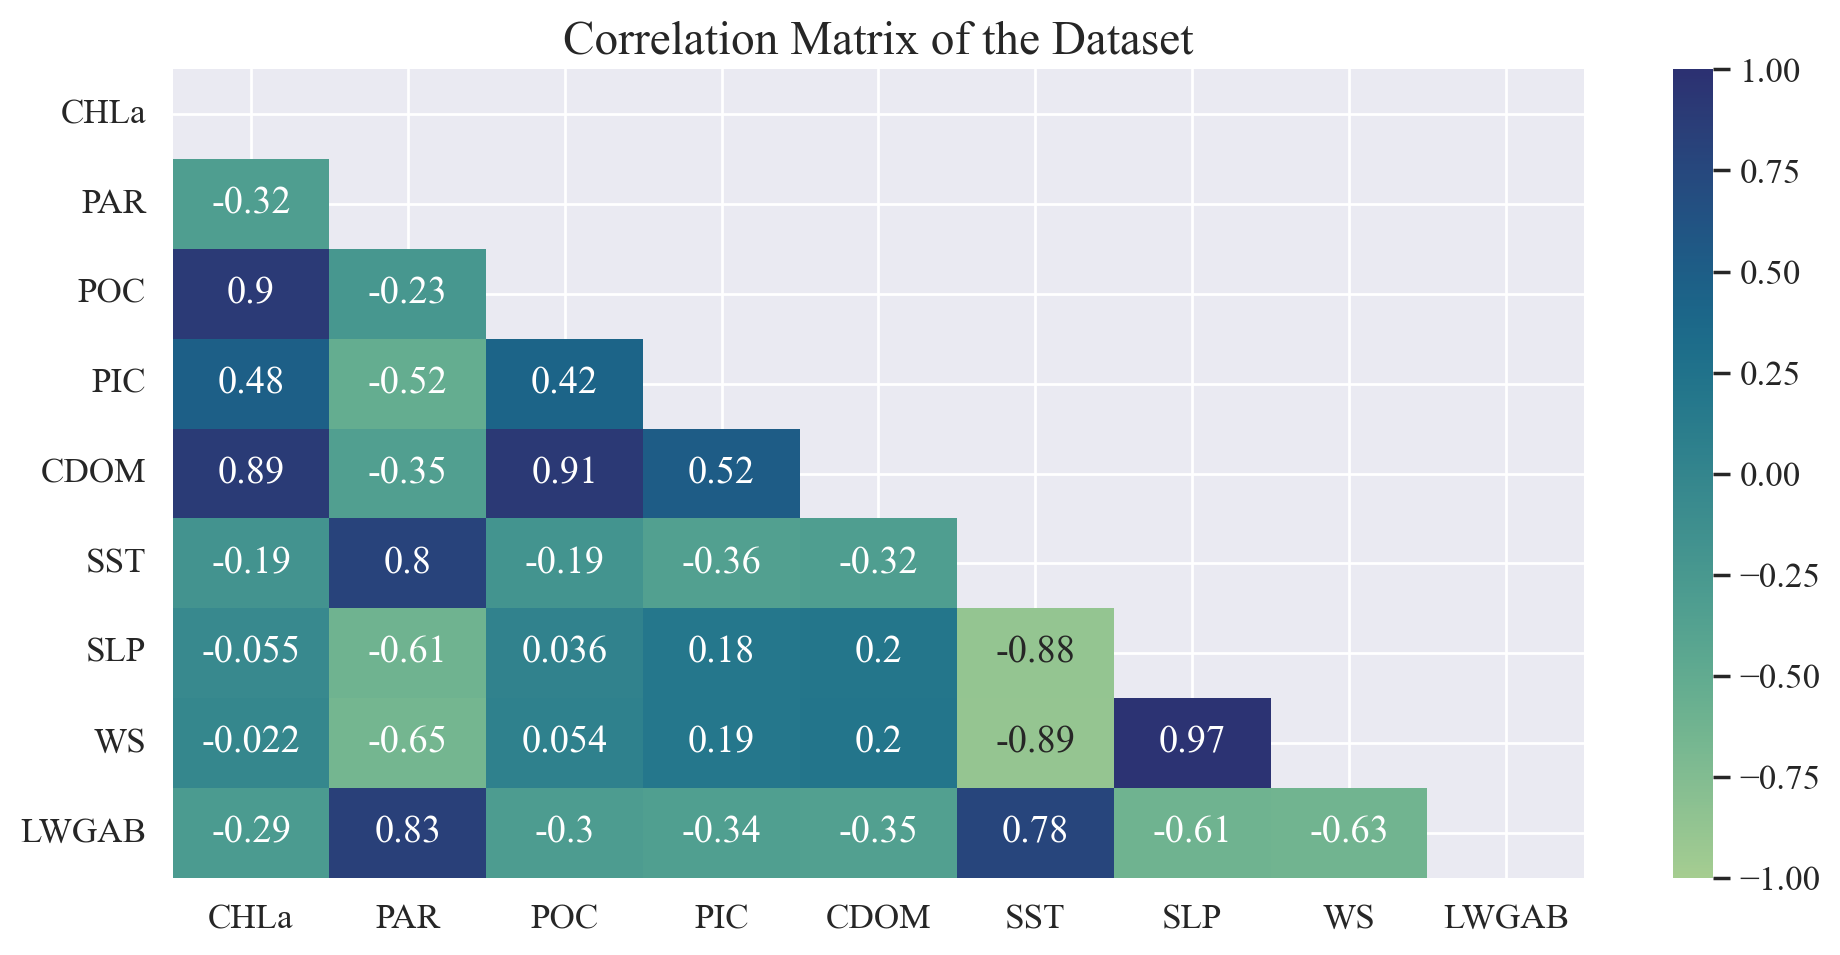

In [9]:
df

plt.figure(figsize=(10,5))
a= df.corr()
mask = np.zeros_like(a)
mask[np.triu_indices_from(mask)] = True
sns.set(font="Times New Roman", font_scale=1.15)
sns.heatmap(a, mask=mask, annot=True,  cmap="crest", center=0, vmin=-1, vmax=1).set_title(
    "Correlation Matrix of the Dataset", fontsize=17)
plt.tight_layout()

#plt.savefig("C://Users//Bijoy//Desktop//Mitra//Chla//ArabianGulf//corr.png", dpi = 1200)

<Figure size 800x400 with 0 Axes>

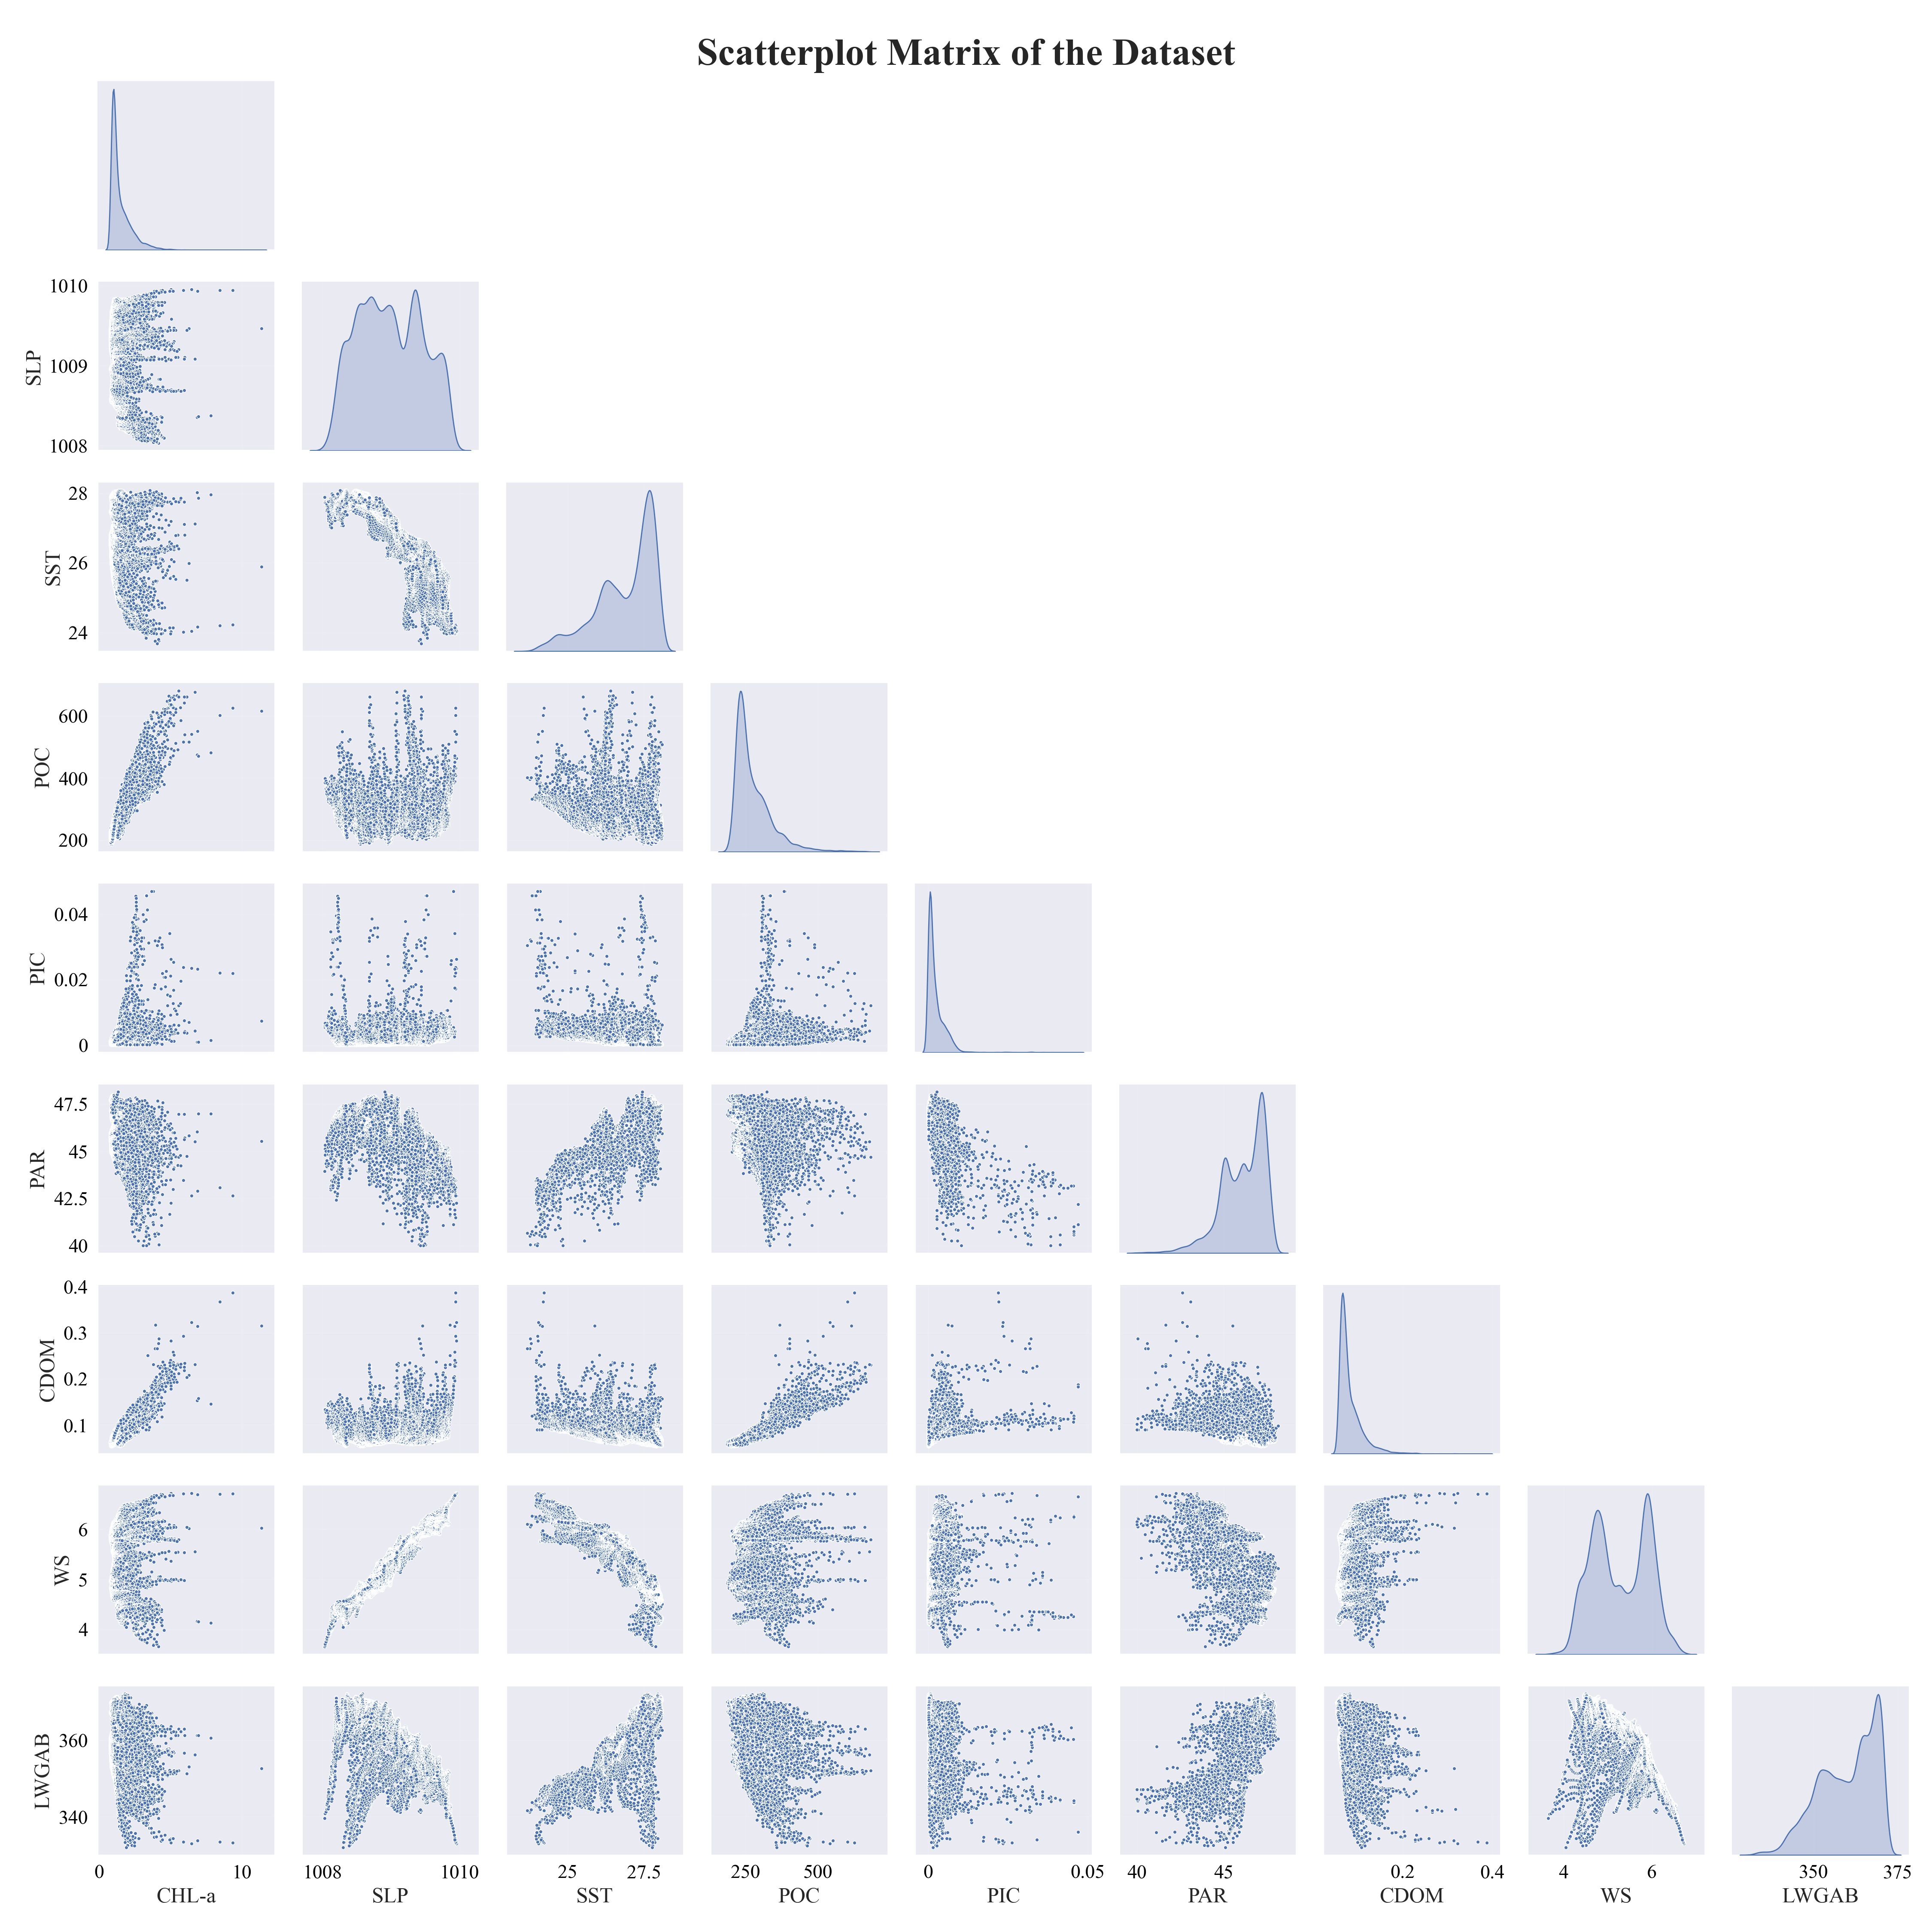

In [71]:
plt.figure(figsize=(8, 4))

sns.set(font="Times New Roman", font_scale=1.5)
sns.pairplot(df, corner=True, markers=".", diag_kind='kde')
plt.suptitle("Scatterplot Matrix of the Dataset", fontsize=32)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//scatterplot.png", dpi = 900)

In [3]:
df=pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//final.csv")
df

Observed  LightGBM   XGBoost  CatBoost       FNN
0       3.89256  4.250215  4.138828  3.969021  3.969021
1       4.18301  4.127279  4.176919  4.081871  4.081871
2       4.06464  4.143395  4.060724  4.154418  4.154418
3       4.14885  4.143395  4.098259  4.154418  4.154418
4       3.28226  3.277229  3.289923  3.271955  3.271955
...         ...       ...       ...       ...       ...
12388   1.62184  1.744630  1.659100  1.771610  1.771610
12389   2.16940  2.126094  2.168002  2.175179  2.175179
12390   2.72842  2.820428  2.766977  2.870293  2.870293
12391   1.89239  1.867648  1.998765  1.934170  1.934170
12392   2.31020  2.259987  2.295742  2.202056  2.202056

[12393 rows x 5 columns]

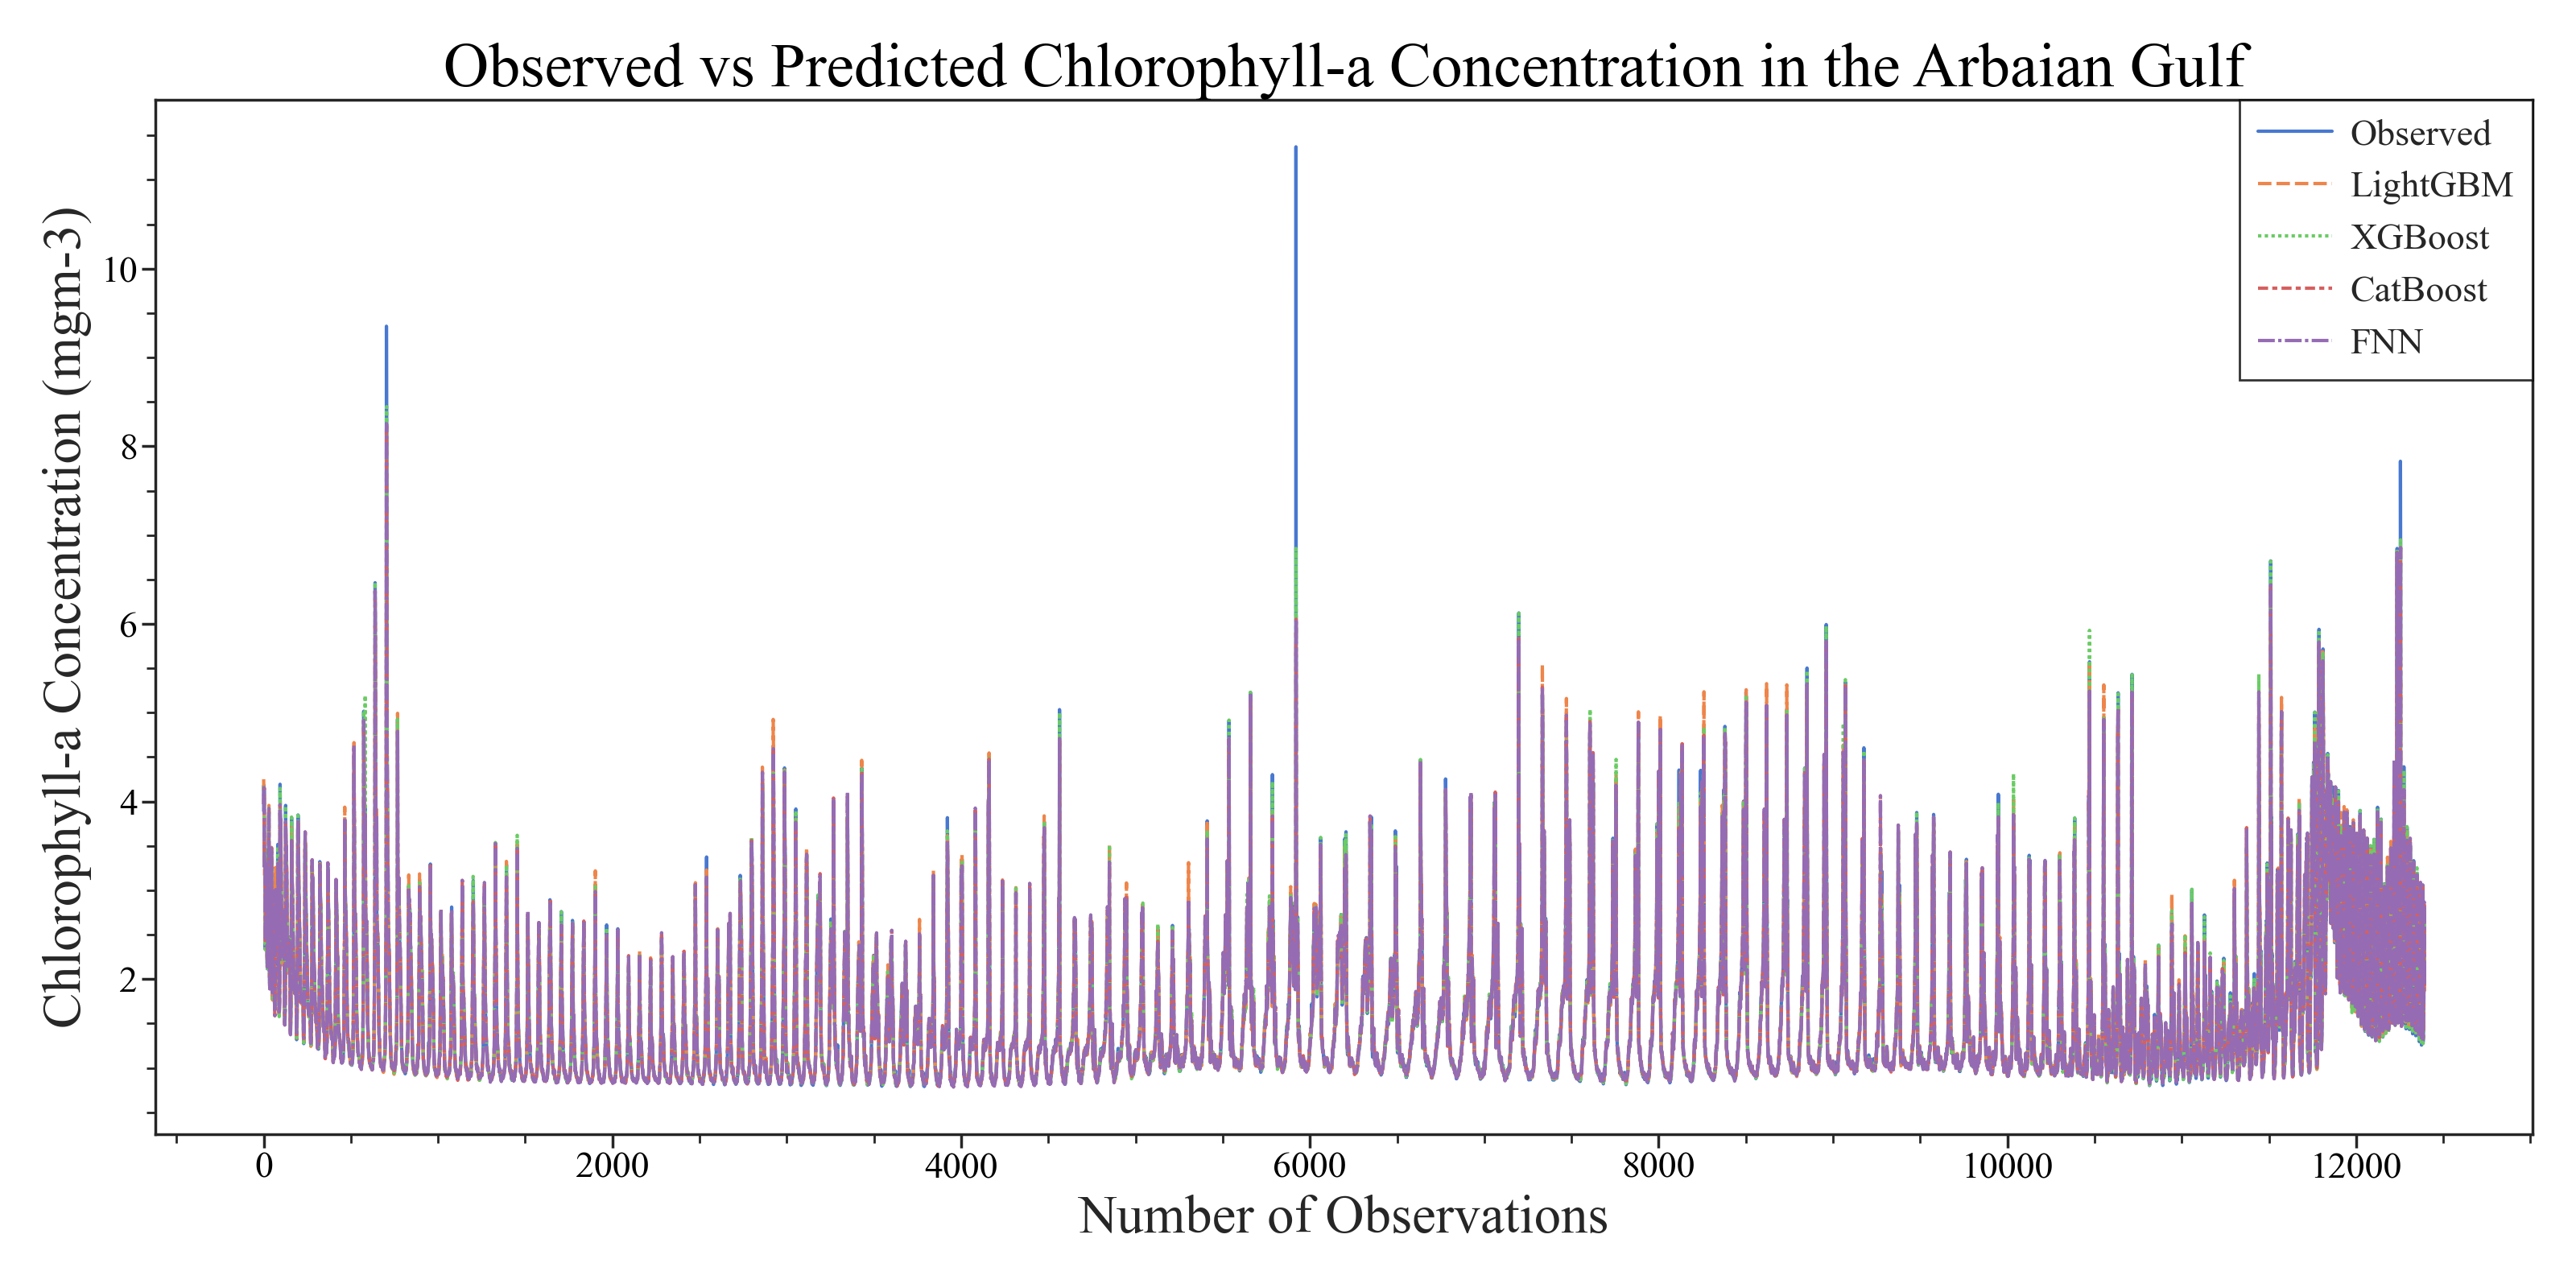

In [6]:
dfs=df
sns.set(font="Times New Roman", font_scale=1.5)
sns.set_style("ticks")
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(16, 8))

sns.lineplot(data=dfs, lw=1.5,palette="muted")
plt.title("Observed vs Predicted Chlorophyll-a Concentration in the Arbaian Gulf", fontsize=28)
plt.xlabel("Number of Observations", fontsize=24)
plt.ylabel("Chlorophyll-a Concentration (mgm-3)",fontsize=24)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//prvte.png", dpi = 1200)

plt.show()

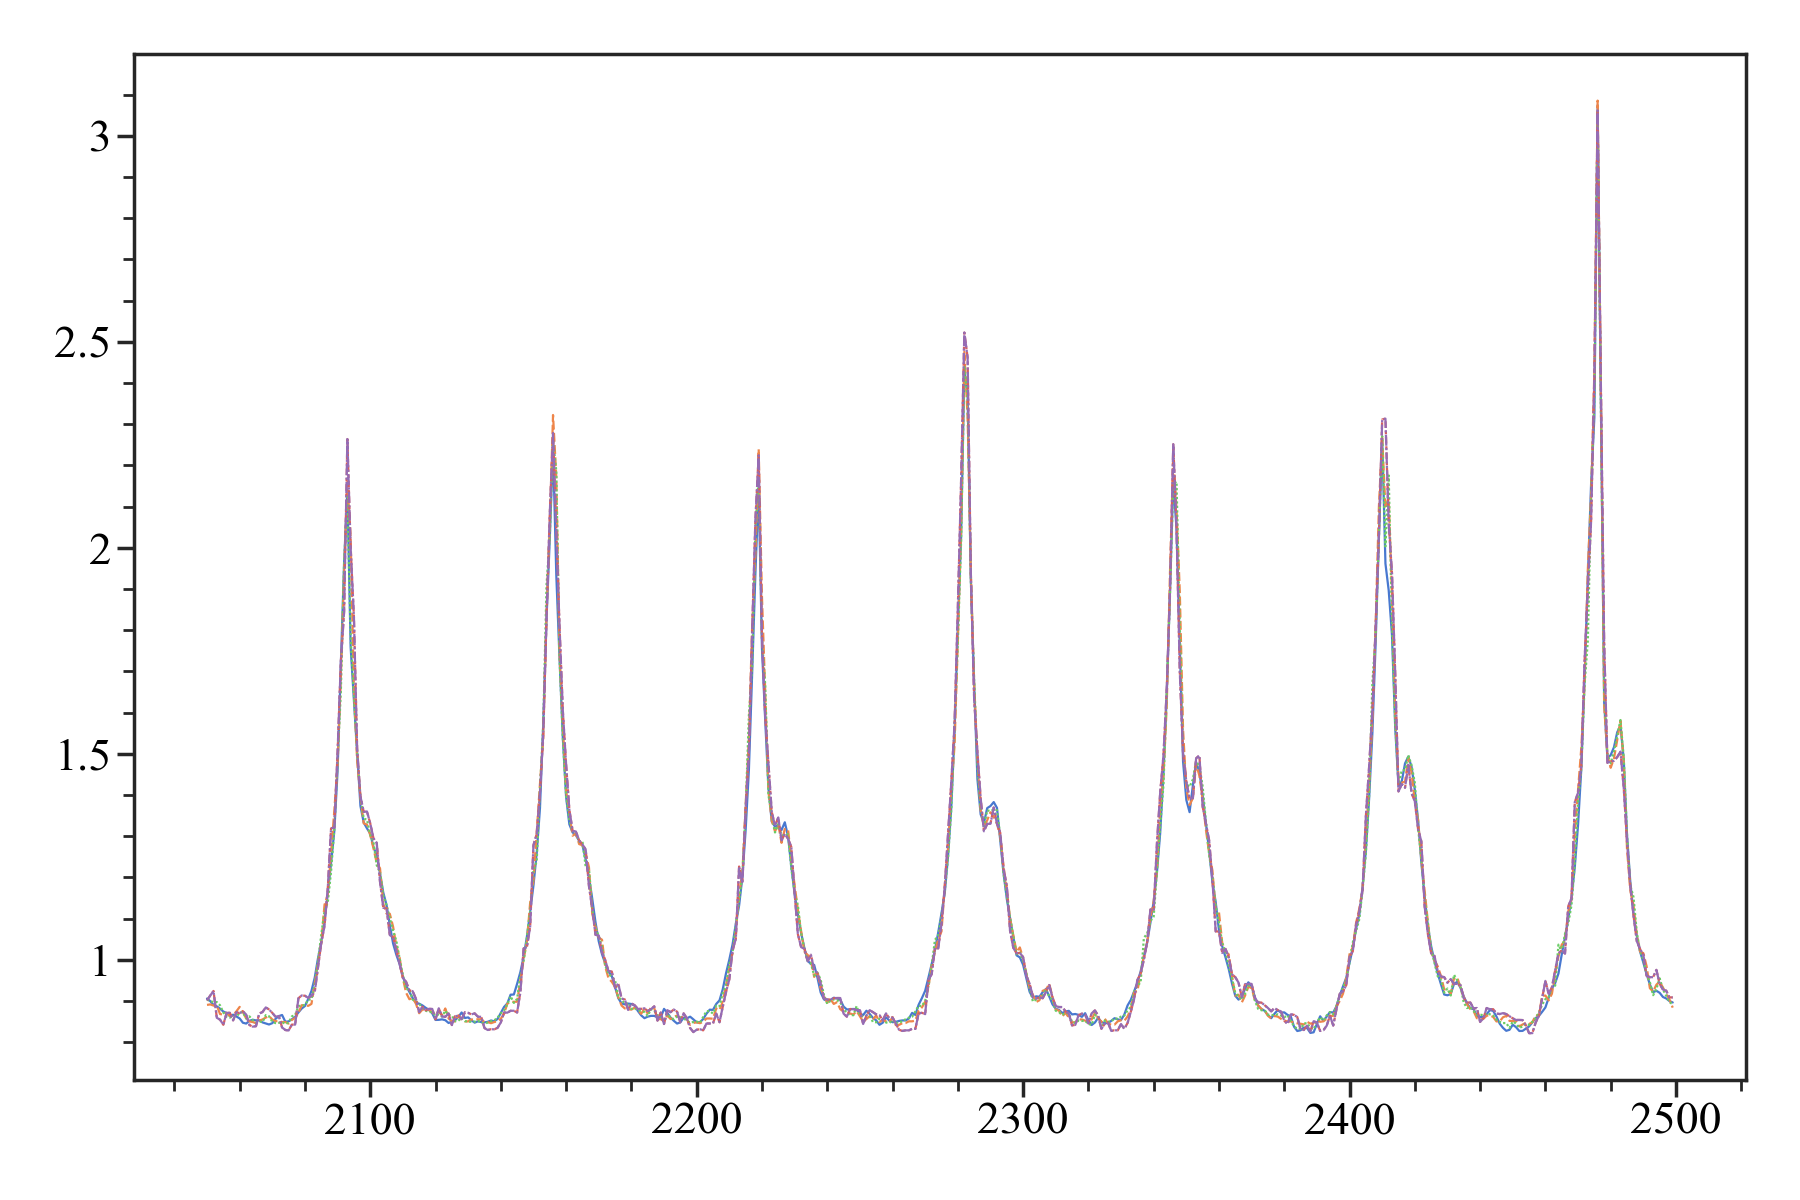

In [93]:
dfs = df.iloc[2050:2500]
sns.set_style("ticks")

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(9, 6))

sns.lineplot(data=dfs, lw=.8, palette="muted", legend=False)
plt.tight_layout()
plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//t1.png", dpi=1200)

plt.show()


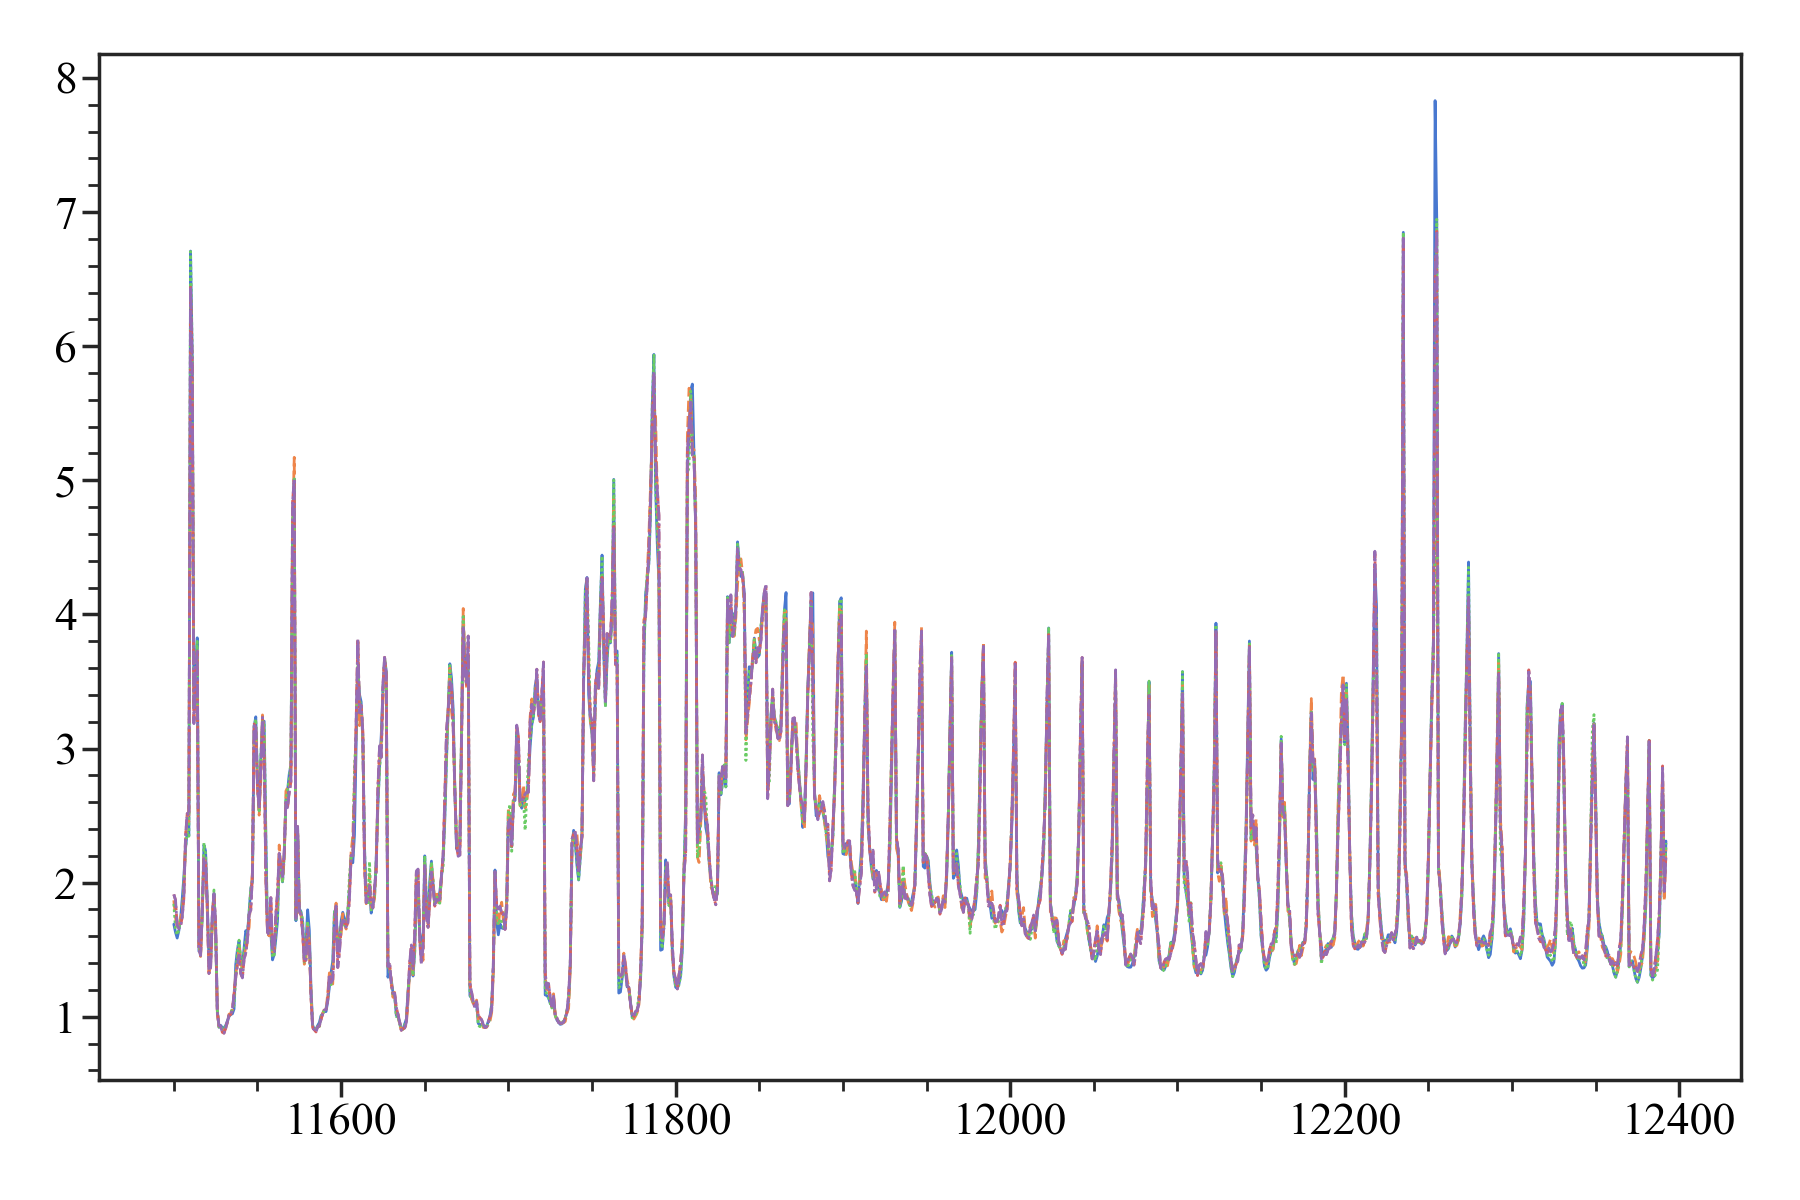

In [94]:
dfs = df.iloc[11500:]
sns.set_style("ticks")
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(9, 6))

sns.lineplot(data=dfs, lw=1, palette="muted", legend=False)
plt.tight_layout()
plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//t2.png", dpi=1200)

plt.show()


In [75]:
df_train = df.iloc[:10000]
df_train

Observed  LightGBM   XGBoost  CatBoost       FNN
0     3.892560  4.250215  4.138828  3.969021  3.969021
1     4.183010  4.127279  4.176919  4.081871  4.081871
2     4.064640  4.143395  4.060724  4.154418  4.154418
3     4.148850  4.143395  4.098259  4.154418  4.154418
4     3.282260  3.277229  3.289923  3.271955  3.271955
...        ...       ...       ...       ...       ...
9995  0.972964  0.987452  0.973252  1.003854  1.003854
9996  0.981495  0.993510  0.984465  0.998413  0.998413
9997  0.982193  0.957495  0.974168  0.957210  0.957210
9998  0.957497  0.932554  0.939021  0.920396  0.920396
9999  0.932955  0.907901  0.922738  0.918720  0.918720

[10000 rows x 5 columns]

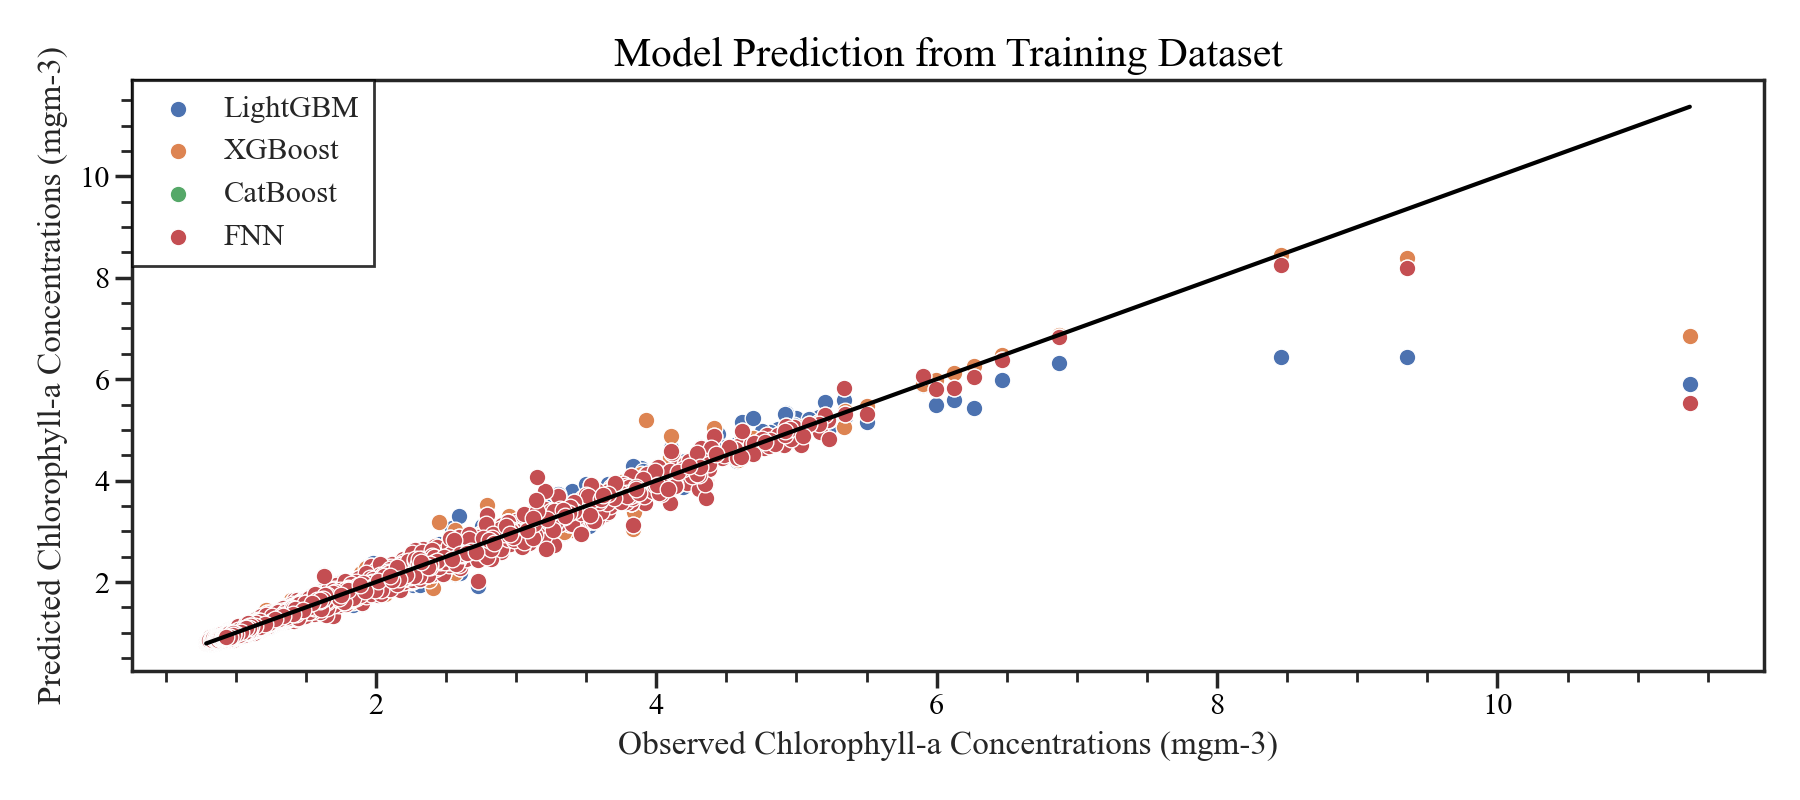

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", font="Times New Roman", font_scale=1)

plt.figure(figsize=(9, 4))

sns.scatterplot(data=df_train, x="Observed", y="LightGBM", label="LightGBM", marker="o")
sns.scatterplot(data=df_train, x="Observed", y="XGBoost", label="XGBoost", marker="o")
sns.scatterplot(data=df_train, x="Observed", y="CatBoost", label="CatBoost", marker="o")
sns.scatterplot(data=df_train, x="Observed", y="FNN", label="FNN", marker="o")

# Add a line
plt.plot([df_train["Observed"].min(), df_train["Observed"].max()], [df_train["Observed"].min(), df_train["Observed"].max()], color="black", linestyle="-")


plt.title("Model Prediction from Training Dataset" , fontsize =15)
plt.xlabel("Observed Chlorophyll-a Concentrations (mgm-3)", fontsize=12)
plt.ylabel("Predicted Chlorophyll-a Concentrations (mgm-3)", fontsize=12)

plt.tight_layout()
plt.legend()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//train.png", dpi = 1200)

plt.show()


In [4]:
df_test = df.iloc[10000:]
df_test

Observed  LightGBM   XGBoost  CatBoost       FNN
10000  0.924989  0.914686  0.919448  0.918720  0.918720
10001  0.918172  0.912417  0.909051  0.917114  0.917114
10002  0.926813  0.926449  0.923467  0.903609  0.903609
10003  0.916469  0.926449  0.919613  0.928826  0.928826
10004  0.912786  0.943195  0.921100  0.943693  0.943693
...         ...       ...       ...       ...       ...
12388  1.621840  1.744630  1.659100  1.771610  1.771610
12389  2.169400  2.126094  2.168002  2.175179  2.175179
12390  2.728420  2.820428  2.766977  2.870293  2.870293
12391  1.892390  1.867648  1.998765  1.934170  1.934170
12392  2.310200  2.259987  2.295742  2.202056  2.202056

[2393 rows x 5 columns]

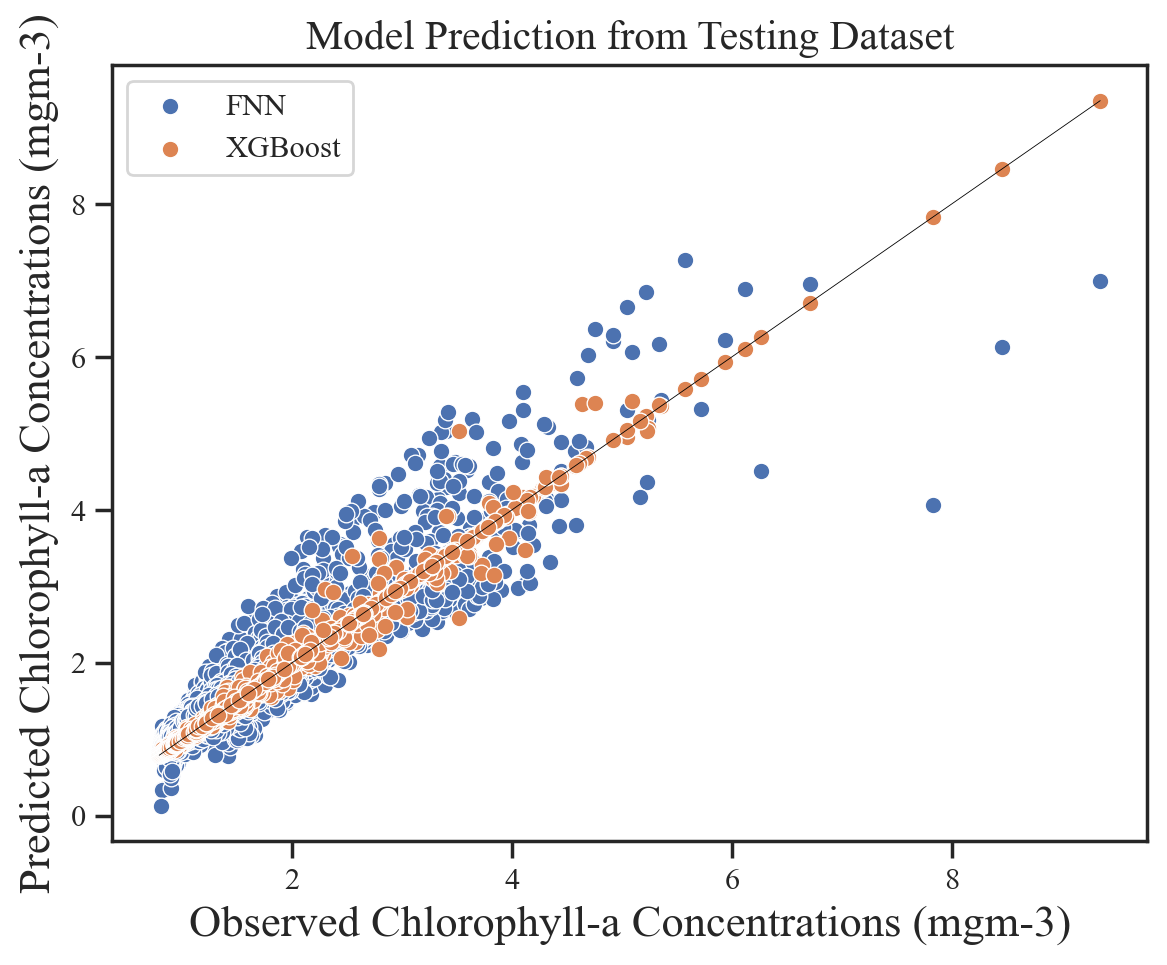

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", font="Times New Roman", font_scale=1)

plt.figure(figsize=(6, 5))

#sns.scatterplot(data=df_test, x="Observed", y="LightGBM", label="LightGBM", marker="o")

#sns.scatterplot(data=df_test, x="Observed", y="CatBoost", label="CatBoost", marker="o")
sns.scatterplot(data=df, x="CHLa", y="FNN", label="FNN", marker="o")
sns.scatterplot(data=df, x="CHLa", y="XGB", label="XGBoost", marker="o")

# Add a line
plt.plot([df["CHLa"].min(), df["CHLa"].max()], [df["CHLa"].min(), df["CHLa"].max()], color="black", linestyle="-",linewidth=0.3)


plt.title("Model Prediction from Testing Dataset" , fontsize =15)
plt.xlabel("Observed Chlorophyll-a Concentrations (mgm-3)", fontsize=16)
plt.ylabel("Predicted Chlorophyll-a Concentrations (mgm-3)", fontsize=16)

plt.tight_layout()
plt.legend()

plt.savefig("C://Users//Bijoy//Desktop//Mitra//Chla//ArabianGulf//test_conf.png", dpi = 1200)

plt.show()


In [96]:
df=pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//featureimp.csv")
df

Feature Importance   LightGBM    XGBoost   CatBoost
0                POC  51.030694  39.878325  42.971660
1                SLP  15.251615  17.896756   9.267501
2               CDOM  14.564131  19.996259  35.325693
3                 WS   5.989240   5.432916   3.688061
4                PAR   5.926756   5.972101   3.497126
5                PIC   3.273744   4.357359   1.514963
6              LWGAB   2.269873   3.396838   1.362375
7                SST   1.693947   3.069446   2.372621

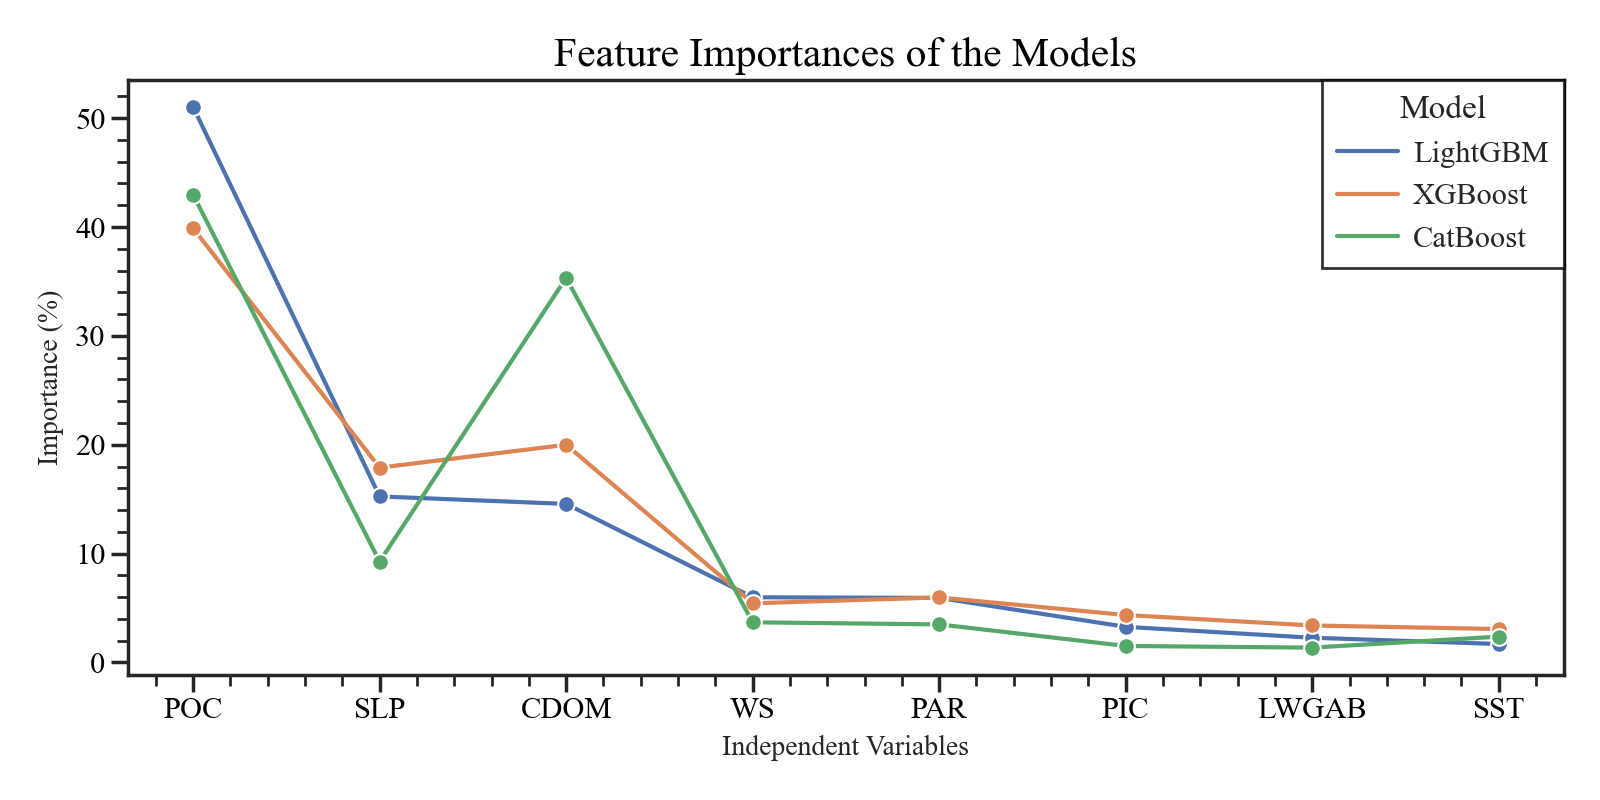

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", font="Times New Roman", font_scale=1)

plt.figure(figsize=(8, 4))

# Assuming you have a DataFrame called 'df' with columns 'Feature Importance', 'RF', 'LGBM', 'Bragging', 'XGBoosting', 'AdaBoosting', 'CatBoost'

# Subset the DataFrame to include only the necessary columns
subset_df = df[['Feature Importance', 'LightGBM', 'XGBoost', 'CatBoost']]

# Melt the DataFrame to convert the 'RF', 'LGBM', 'Bragging', 'XGBoosting', 'AdaBoosting', 'CatBoost' columns into a single column
melted_df = subset_df.melt('Feature Importance', var_name='Model', value_name='Importance')

# Create the line plot
sns.lineplot(data=melted_df, x='Feature Importance', y='Importance', hue='Model', marker="o", color="reds")
plt.title("Feature Importances of the Models", fontsize=15)
plt.xlabel("Independent Variables",fontsize=10)
plt.ylabel("Importance (%)",fontsize=10)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//Chla//ArabianGulf//featureimp.png", dpi = 900)

plt.show()
